# Problem Statement
A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. Regression analysis can be useful in predicting the price of the house.

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from matplotlib import pyplot as plt

from scipy.stats import shapiro

import statsmodels
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# 2.Set option


In [2]:
#to display all columns of dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# 2.Read data

In [3]:
#Read the data using pandas
data= pd.read_csv("C:/Users/Reby Varghese/Property Price Prediction/Dataset/HousePrices.csv")
data.head(5)

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm          1Fam     2Story            7            5   
1      Feedr       Norm          1Fam     1Story            6            8   
2       Norm       Norm          1Fam     2Story            7            5   
3       Norm       Norm          1Fam     2Story            7            5   
4       Norm       Norm          1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ 

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   Zone_Class           1460 non-null   object 
 3   LotFrontage          1201 non-null   float64
 4   LotArea              1460 non-null   int64  
 5   Road_Type            1460 non-null   object 
 6   Alley                91 non-null     object 
 7   Property_Shape       1460 non-null   object 
 8   LandContour          1460 non-null   object 
 9   Utilities            1460 non-null   object 
 10  LotConfig            1460 non-null   object 
 11  LandSlope            1460 non-null   object 
 12  Neighborhood         1460 non-null   object 
 13  Condition1           1460 non-null   object 
 14  Condition2           1460 non-null   object 
 15  Dwelling_Type        1460 non-null   o

# 4. Data Analysis and Preparation

Things to do in EDA before applying machine learning algorithm



    1.Check the datatype and change it as per the business
    2.Handling missing values 
    3.Handling outliers
    4.Handling categorical values
    5 Study correaltion
    6.Summary statistics
    7.Distribution of variables

### Understand the dataset

In [6]:
#check for the default data types
data.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [7]:
#converting some of the above datatypes to object datatypes as per data defintion

data['Dwell_Type']=data['Dwell_Type'].astype('object')
data['OverallQual']=data['OverallQual'].astype('object')
data['OverallCond']=data['OverallCond'].astype('object')

In [8]:
#As Id column does not provide any value to the model hence dropping Id 

data.drop(['Id'], axis=1, inplace= True)
data.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

In [9]:
#creating a deep copy of the df_property to perform EDA
df= data.copy()
df.shape

(1460, 80)

## Summary statistics

Here we'll be doing a descriptive statistics for both continous and categorical variables

In [10]:
#for continous variable
df.describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1201.000000    1460.000000  1460.000000   1460.000000  1452.000000   
mean     70.049958   10516.828082  1971.267808   1984.865753   103.685262   
std      24.284752    9981.264932    30.202904     20.645407   181.066207   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      59.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      80.000000   11601.500000  2000.000000   2004.000000   166.000000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1978.506164     1.767123   472.980137    94.244521   
std       0.644666    24.689725     0.747315   213.804841   125.338794   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
25%       0.000000  1961.000000     1.000000   334.500000     0.000000   
50%       1.000000  1980.000000     2.000000   480.000000     0.000000   
75%       1.000000  2002.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000

In [11]:
#for categorical variable
df.describe(include=np.object)

Dwell_Type Zone_Class Road_Type Alley Property_Shape LandContour  \
count         1460       1460      1460    91           1460        1460   
unique          15          5         2     2              4           4   
top             20         RL      Pave  Grvl            Reg         Lvl   
freq           536       1151      1454    50            925        1311   

       Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
count       1460      1460      1460         1460       1460       1460   
unique         2         5         3           25          9          8   
top       AllPub    Inside       Gtl        NAmes       Norm       Norm   
freq        1459      1052      1382          225       1260       1445   

       Dwelling_Type HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
count           1460       1460         1460         1460      1460     1460   
unique             5          8           10            9         6        8   
top             1Fam     1Story            5            5     Gable  CompShg   
freq            1220        726          397          821      1141     1434   

       Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
count         1460        1460       1452      1460      1460       1460   
unique          15          16          4         4         5          6   
top        VinylSd     VinylSd       None        TA        TA      PConc   
freq           515         504        864       906      1282        647   

       BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      1423     1423         1422         1423         1422    1460   
unique        4        4            4            6            6       6   
top          TA       TA           No          Unf          Unf    GasA   
freq        649     1311          953          430         1256    1428   

       HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
count       1460       1460       1459        1460       1460         770   
unique         5          2          5           4          7           5   
top           Ex          Y      SBrkr          TA        Typ          Gd   
freq         741       1365       1334         735       1360         380   

       GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count        1379         1379       1379       1379       1460      7    281   
unique          6            3          5          5          3      3      4   
top        Attchd          Unf         TA         TA          Y     Gd  MnPrv   
freq          870          605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198

As we can see some of the varibales of both continous and categorical have count less than total no. of observation, which indicates the missing values 

## Distribution of  variables

Plot the histogram for knowing the distribution of numeric variablese

In [12]:
#create a variable for storing numeric datatype
df_numeric_feature= df.select_dtypes(include= np.number)
print(df_numeric_feature.shape)

#34 out of 80 features is numeric variables
df_numeric_feature.columns

(1460, 34)


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

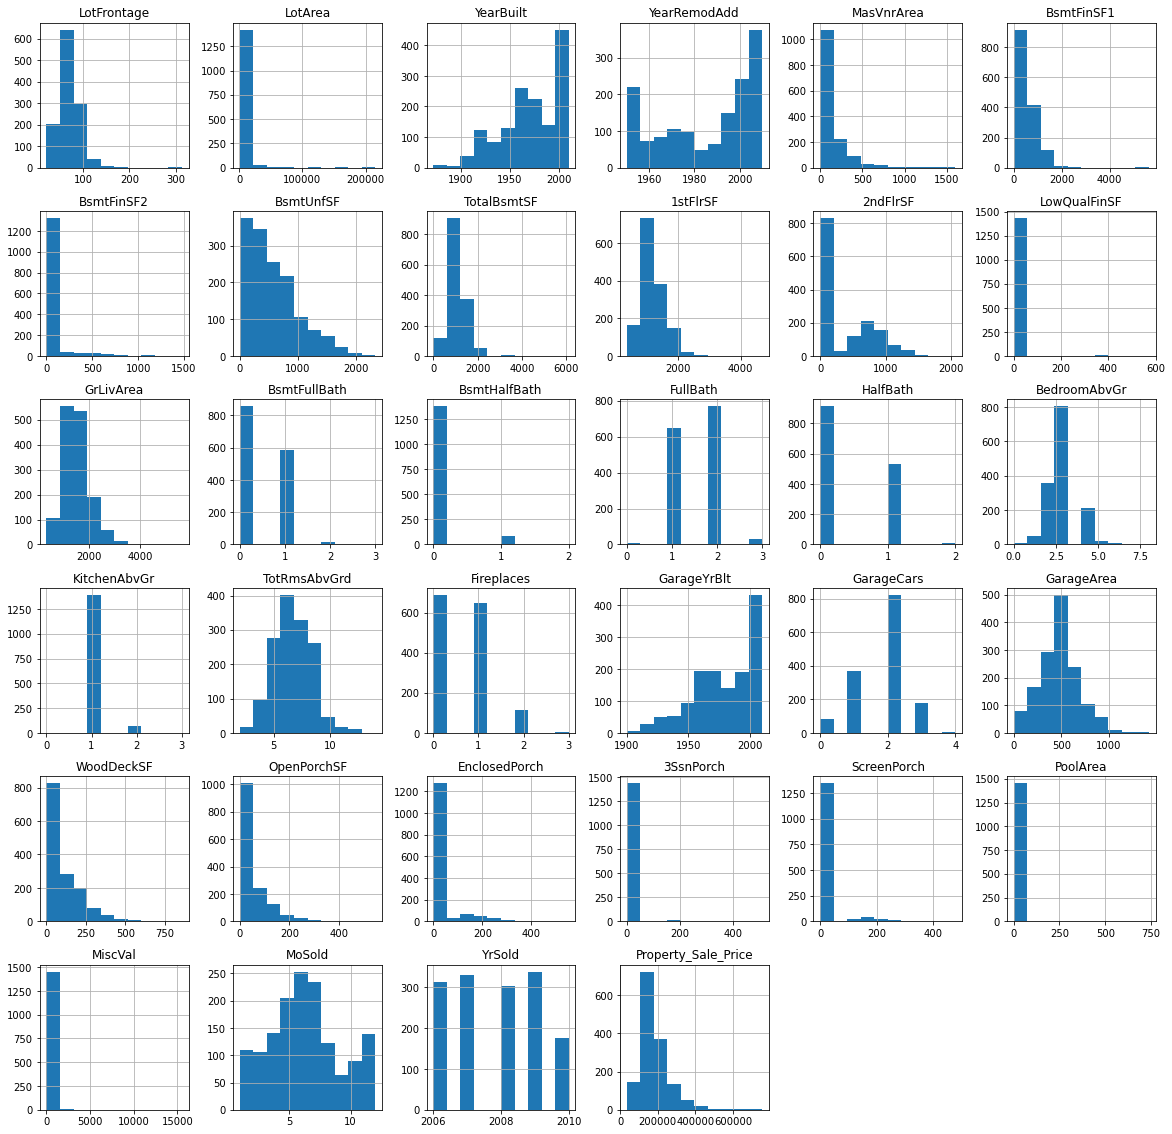

In [13]:
df_numeric_feature.hist(figsize=(20,20))
plt.show()

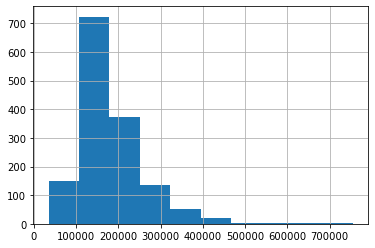

In [14]:
#visualize the target variable
df_numeric_feature['Property_Sale_Price'].hist()
plt.show() 
#shows the below graph is rightly skewed

In [15]:
#creating a variable for categorical feature
df_categorical_feature=df.select_dtypes(include= "object")
print(df_categorical_feature.shape)

df_categorical_feature.columns

(1460, 46)


Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

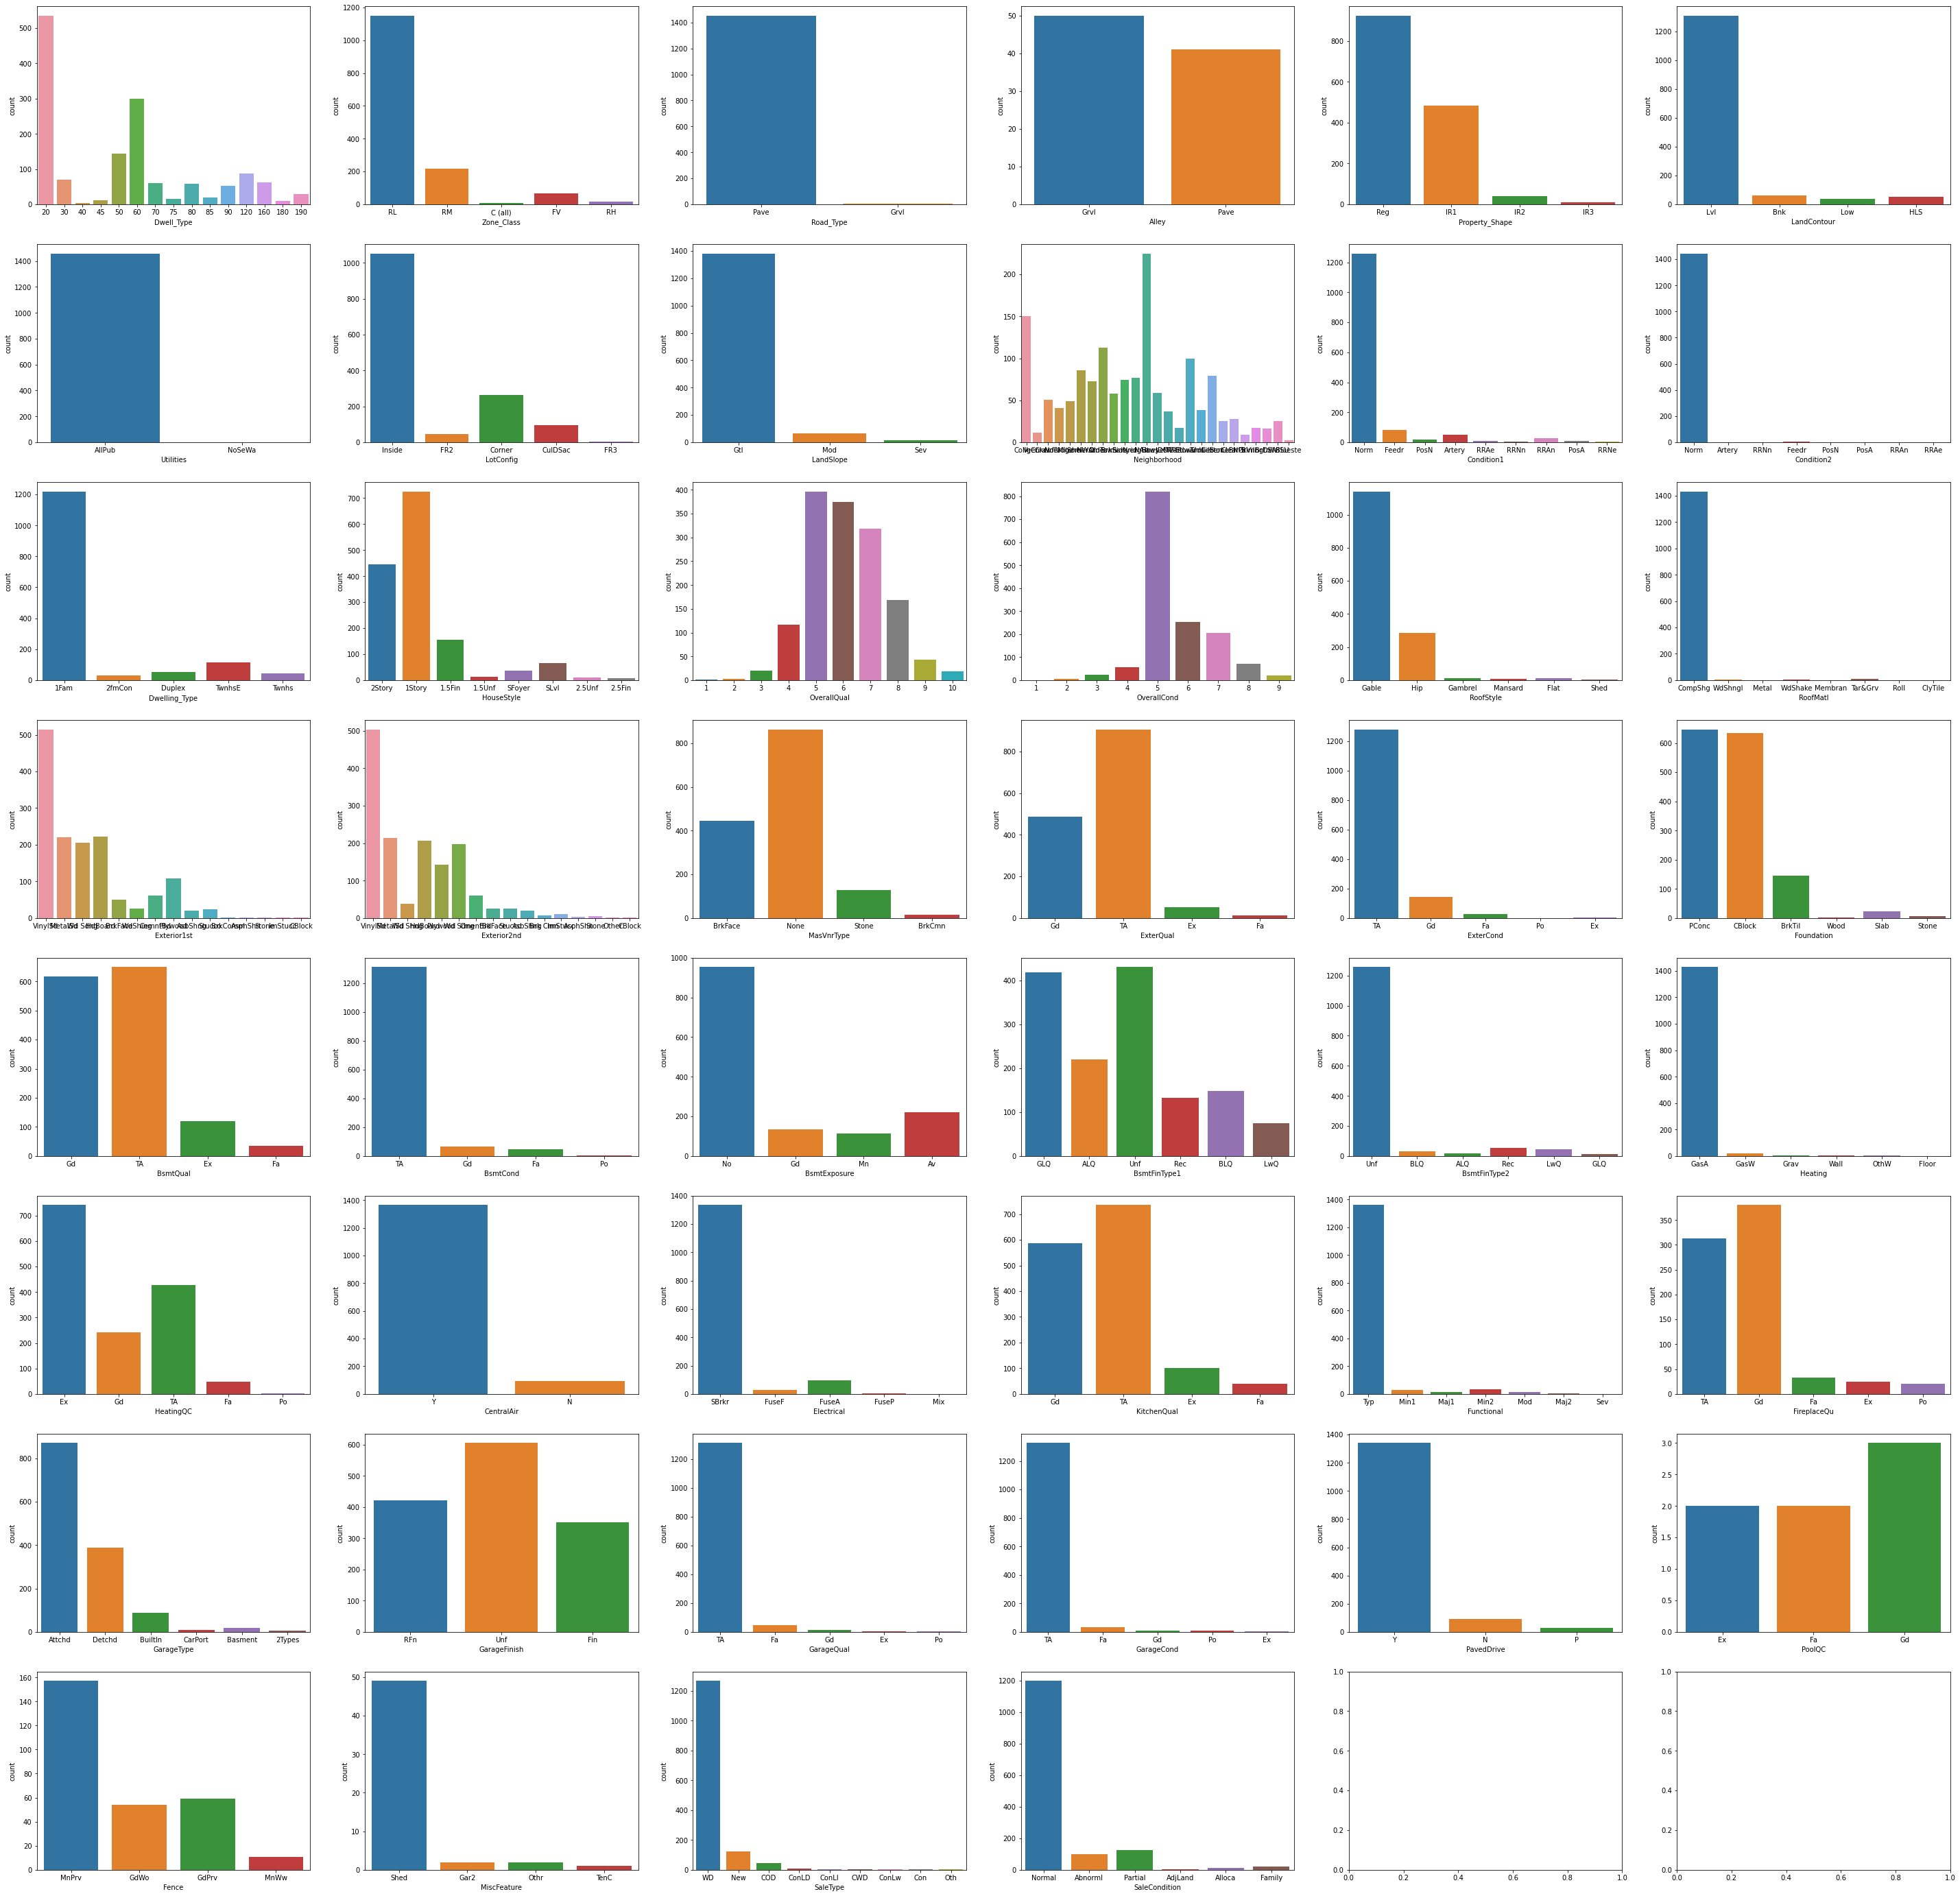

In [16]:
#plottind multiple countplot for all categorical features 


fig, ax=plt.subplots(nrows=8, ncols=6, figsize=(50,50))
for variable, subplot in zip(df_categorical_feature,ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
plt.show()

## Discovering and Handling Outliers 

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


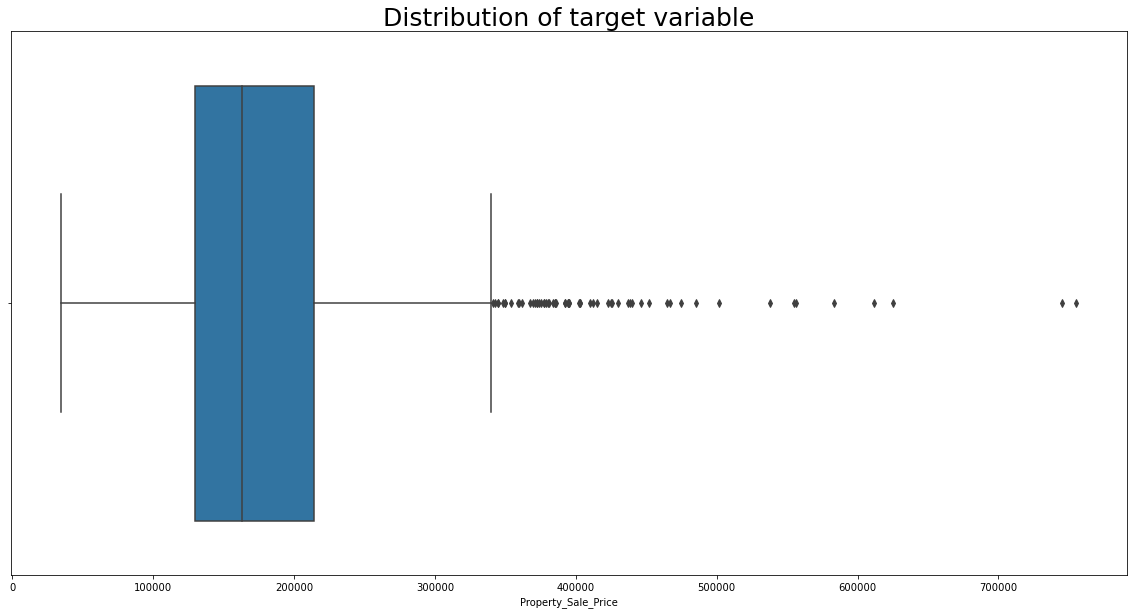

In [17]:
#discovering the outlier using boxplot of target variables
plt.figure(figsize=(20,10))
plt.title("Distribution of target variable", fontsize=25)
sns.boxplot(df["Property_Sale_Price"])
plt.show()

The above graph showsthat  there is outliers in distribution of target variable, which need to be treated to get good predictions

In [18]:
#reomving the observations which are greater than 500000
df=df.loc[df["Property_Sale_Price"] < 500000]
df.shape

(1451, 80)

## Handling Missing Values

In [19]:
total_nulls=df.isnull().sum().sort_values(ascending= False)


missing_value= pd.DataFrame(total_nulls, columns=["Total nulls"])
missing_value['Data type']=df[missing_value.index].dtypes

missing_value

Total nulls Data type
PoolQC                      1445    object
MiscFeature                 1397    object
Alley                       1360    object
Fence                       1171    object
FireplaceQu                  690    object
LotFrontage                  259   float64
GarageYrBlt                   81   float64
GarageCond                    81    object
GarageType                    81    object
GarageFinish                  81    object
GarageQual                    81    object
BsmtExposure                  38    object
BsmtFinType2                  38    object
BsmtCond                      37    object
BsmtQual                      37    object
BsmtFinType1                  37    object
MasVnrArea                     8   float64
MasVnrType                     8    object
Electrical                     1    object
Dwell_Type                     0    object
Fireplaces                     0     int64
Functional                     0    object
KitchenQual                    0    object
KitchenAbvGr                   0     int64
BedroomAbvGr                   0     int64
HalfBath                       0     int64
FullBath                       0     int64
BsmtHalfBath                   0     int64
TotRmsAbvGrd                   0     int64
GarageCars                     0     int64
GrLivArea                      0     int64
GarageArea                     0     int64
PavedDrive                     0    object
WoodDeckSF                     0     int64
OpenPorchSF                    0     int64
EnclosedPorch                  0     int64
3SsnPorch                      0     int64
ScreenPorch                    0     int64
PoolArea                       0     int64
MiscVal                        0     int64
MoSold                         0     int64
YrSold                         0     int64
SaleType                       0    object
SaleCondition                  0    object
BsmtFullBath                   0     int64
CentralAir                     0    object
LowQualFinSF                   0     int64
Neighborhood                   0    object
OverallCond                    0    object
OverallQual                    0    object
HouseStyle                     0    object
Dwelling_Type                  0    object
Condition2                     0    object
Condition1                     0    object
LandSlope                      0    object
2ndFlrSF                       0     int64
LotConfig                      0    object
Utilities                      0    object
LandContour                    0    object
Property_Shape                 0    object
Road_Type                      0    object
LotArea                        0     int64
YearBuilt                      0     int64
YearRemodAdd                   0     int64
RoofStyle                      0    object
RoofMatl                       0    object
Exterior1st                    0    object
Exterior2nd                    0    object
ExterQual                      0    object
ExterCond                      0    object
Foundation                     0    object
BsmtFinSF1                     0     int64
BsmtFinSF2                     0     int64
BsmtUnfSF                      0     int64
TotalBsmtSF                    0     int64
Heating                        0    object
HeatingQC                      0    object
Zone_Class                     0    object
1stFlrSF                       0     int64
Property_Sale_Price            0     int64

we can see that 19 variables have missing values, will handle numeric and object variables seperately

#### Missing value treatment for categorical variable

In [20]:
missing_categorical_variable=missing_value.loc[(missing_value["Data type"]=="object") & (missing_value['Total nulls'] > 0)]
missing_categorical_variable

Total nulls Data type
PoolQC               1445    object
MiscFeature          1397    object
Alley                1360    object
Fence                1171    object
FireplaceQu           690    object
GarageCond             81    object
GarageType             81    object
GarageFinish           81    object
GarageQual             81    object
BsmtExposure           38    object
BsmtFinType2           38    object
BsmtCond               37    object
BsmtQual               37    object
BsmtFinType1           37    object
MasVnrType              8    object
Electrical              1    object

In [21]:
df.shape

(1451, 80)

In poolQC 6 variables are not null values out of 1451, and also poolArea contains only the area of these 6 variable, thus,
we will remove the variables poolQC and PoolArea

In [22]:
#According to "NAN" in Miscfeature, Alley, Fence and Fireplacequ is absence of respective featues, thus filling with none

df["PoolQC"].fillna('No pool', inplace=True)
df['MiscFeature'].fillna('No MiscFeature', inplace=True)
df["Alley"].fillna("No Alley", inplace= True)
df["Fence"].fillna("No Fence" , inplace= True)
df["FireplaceQu"].fillna("No Fireplace", inplace=True)

In [23]:
#replcing the missing values of categorical features representing the garage by "no garage"

for col in ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]:
    df[col].fillna("No Garage", inplace= True)

In [24]:
# replace the missing values in the categoric variables representing the basement by `No Basement`
for col in ['BsmtExposure','BsmtFinType2','BsmtCond', 'BsmtQual', 'BsmtFinType1']:
    df[col].fillna("No Basement", inplace = True)

In [25]:
df["MasVnrType"].fillna("None", inplace= True)

In [26]:
# replace the missing values in the categorical variable 'Electrical' with its mode
mode_electrical=df['Electrical'].mode()[0]
df['Electrical'].fillna(mode_electrical, inplace= True)

#### Missing value treatment for numerical  variable

In [27]:
missing_numeric_variables=missing_value.loc[(missing_value['Total nulls']>0) & (missing_value['Data type'] != "object")]
missing_numeric_variables

Total nulls Data type
LotFrontage          259   float64
GarageYrBlt           81   float64
MasVnrArea             8   float64

In [28]:
#LotFrontage is rightly skewed, thus we will fill its median value
median_LotFrontage= df['LotFrontage'].median()
df['LotFrontage'].fillna(median_LotFrontage, inplace= True)

In [29]:
# values of GarageYRBlt is missing because of no garage, thus filling it value 0
df['GarageYrBlt'].fillna(0 , inplace= True)

#similarlt values of MasVnrArea	 is missing because of no presence of masvnr, thus filling it with 0
df['MasVnrArea'].fillna(0, inplace= True)

In [30]:
df.head(10)

Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type     Alley  \
0         60         RL         65.0     8450      Pave  No Alley   
1         20         RL         80.0     9600      Pave  No Alley   
2         60         RL         68.0    11250      Pave  No Alley   
3         70         RL         60.0     9550      Pave  No Alley   
4         60         RL         84.0    14260      Pave  No Alley   
5         50         RL         85.0    14115      Pave  No Alley   
6         20         RL         75.0    10084      Pave  No Alley   
7         60         RL         69.0    10382      Pave  No Alley   
8         50         RM         51.0     6120      Pave  No Alley   
9        190         RL         50.0     7420      Pave  No Alley   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
5            IR1         Lvl    AllPub    Inside       Gtl      Mitchel   
6            Reg         Lvl    AllPub    Inside       Gtl      Somerst   
7            IR1         Lvl    AllPub    Corner       Gtl       NWAmes   
8            Reg         Lvl    AllPub    Inside       Gtl      OldTown   
9            Reg         Lvl    AllPub    Corner       Gtl      BrkSide   

  Condition1 Condition2 Dwelling_Type HouseStyle OverallQual OverallCond  \
0       Norm       Norm          1Fam     2Story           7           5   
1      Feedr       Norm          1Fam     1Story           6           8   
2       Norm       Norm          1Fam     2Story           7           5   
3       Norm       Norm          1Fam     2Story           7           5   
4       Norm       Norm          1Fam     2Story           8           5   
5       Norm       Norm          1Fam     1.5Fin           5           5   
6       Norm       Norm          1Fam     1Story           8           5   
7       PosN       Norm          1Fam     2Story           7           6   
8     Artery       Norm          1Fam     1.5Fin           7           5   
9     Artery     Artery        2fmCon     1.5Unf           5           6   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   
5       1993          1995     Gable  CompShg     VinylSd     VinylSd   
6       2004          2005     Gable  CompShg     VinylSd     VinylSd   
7       1973          1973     Gable  CompShg     HdBoard     HdBoard   
8       1931          1950     Gable  CompShg     BrkFace     Wd Shng   
9       1939          1950     Gable  CompShg     MetalSd     MetalSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   
5       None         0.0        TA        TA       Wood       Gd       TA   
6      Stone       186.0        Gd        TA      PConc       Ex       TA   
7      Stone       240.0        TA        TA     CBlock       Gd       TA   
8       None         0.0        TA        TA     BrkTil       TA       TA   
9    

## Study correlation 

In [31]:
#correlation matrix for numeric variables
corrmat= df.corr()
corrmat

LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
LotFrontage             1.000000  0.306226   0.110575      0.078240   
LotArea                 0.306226  1.000000   0.007052      0.007963   
YearBuilt               0.110575  0.007052   1.000000      0.590358   
YearRemodAdd            0.078240  0.007963   0.590358      1.000000   
MasVnrArea              0.168580  0.079576   0.308832      0.170015   
BsmtFinSF1              0.201974  0.204725   0.242388      0.120246   
BsmtFinSF2              0.041758  0.113638  -0.050381     -0.069146   
BsmtUnfSF               0.122341 -0.002229   0.147484      0.179966   
TotalBsmtSF             0.351744  0.253819   0.385072      0.284008   
1stFlrSF                0.403928  0.293575   0.272635      0.232100   
2ndFlrSF                0.055154  0.033593   0.002106      0.136997   
LowQualFinSF            0.038892  0.005727  -0.183659     -0.061920   
GrLivArea               0.352795  0.248741   0.188173      0.283858   
BsmtFullBath            0.087810  0.154564   0.185755      0.117521   
BsmtHalfBath           -0.009650  0.047356  -0.039128     -0.012512   
FullBath                0.166976  0.111174   0.464424      0.436448   
HalfBath                0.039602  0.006873   0.239822      0.180804   
BedroomAbvGr            0.233933  0.114221  -0.073171     -0.041872   
KitchenAbvGr           -0.003219 -0.016372  -0.174064     -0.148847   
TotRmsAbvGrd            0.311321  0.175347   0.081196      0.181722   
Fireplaces              0.223229  0.268811   0.140979      0.106649   
GarageYrBlt             0.097975  0.071133   0.271118      0.145115   
GarageCars              0.261254  0.145224   0.533519      0.416036   
GarageArea              0.317880  0.171107   0.474181      0.366411   
WoodDeckSF              0.073205  0.159650   0.223873      0.205597   
OpenPorchSF             0.133322  0.084143   0.186221      0.224186   
EnclosedPorch           0.013371 -0.015829  -0.386450     -0.192517   
3SsnPorch               0.063617  0.021493   0.032225      0.046070   
ScreenPorch             0.035947  0.032825  -0.057585     -0.045230   
PoolArea                0.154557  0.079291  -0.002602      0.001135   
MiscVal                 0.000464  0.039093  -0.033934     -0.009821   
MoSold                  0.015944  0.003327   0.016370      0.025102   
YrSold                  0.009395 -0.016991  -0.016129      0.033392   
Property_Sale_Price     0.318744  0.252156   0.543898      0.531708   

                     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage            0.168580    0.201974    0.041758   0.122341   
LotArea                0.079576    0.204725    0.113638  -0.002229   
YearBuilt              0.308832    0.242388   -0.050381   0.147484   
YearRemodAdd           0.170015    0.120246   -0.069146   0.179966   
MasVnrArea             1.000000    0.237426   -0.070851   0.116437   
BsmtFinSF1             0.237426    1.000000   -0.054443  -0.502348   
BsmtFinSF2            -0.070851   -0.054443    1.000000  -0.211681   
BsmtUnfSF              0.116437   -0.502348   -0.211681   1.000000   
TotalBsmtSF            0.340365    0.506796    0.101582   0.422596   
1stFlrSF               0.318259    0.427145    0.096551   0.322023   
2ndFlrSF               0.150374   -0.160550   -0.096758  -0.000493   
LowQualFinSF          -0.069527   -0.064339    0.014921   0.028657   
GrLivArea              0.358948    0.177440   -0.008304   0.243351   
BsmtFullBath           0.078313    0.652108    0.158017  -0.421408   
BsmtHalfBath           0.015343    0.065858    0.072546  -0.099057   
FullBath               0.251721    0.039019   -0.076080   0.286674   
HalfBath               0.192394   -0.003163   -0.029227  -0.044902   
BedroomAbvGr           0.099591   -0.108698   -0.012647   0.162806   
KitchenAbvGr          -0.036336   -0.080020   -0.040788   0.030833   
TotRmsAbvGrd           0.254011    0.016513   -0.036589   0.248991   
Fireplaces             0.238226    0.245847    0.044752   0.05076

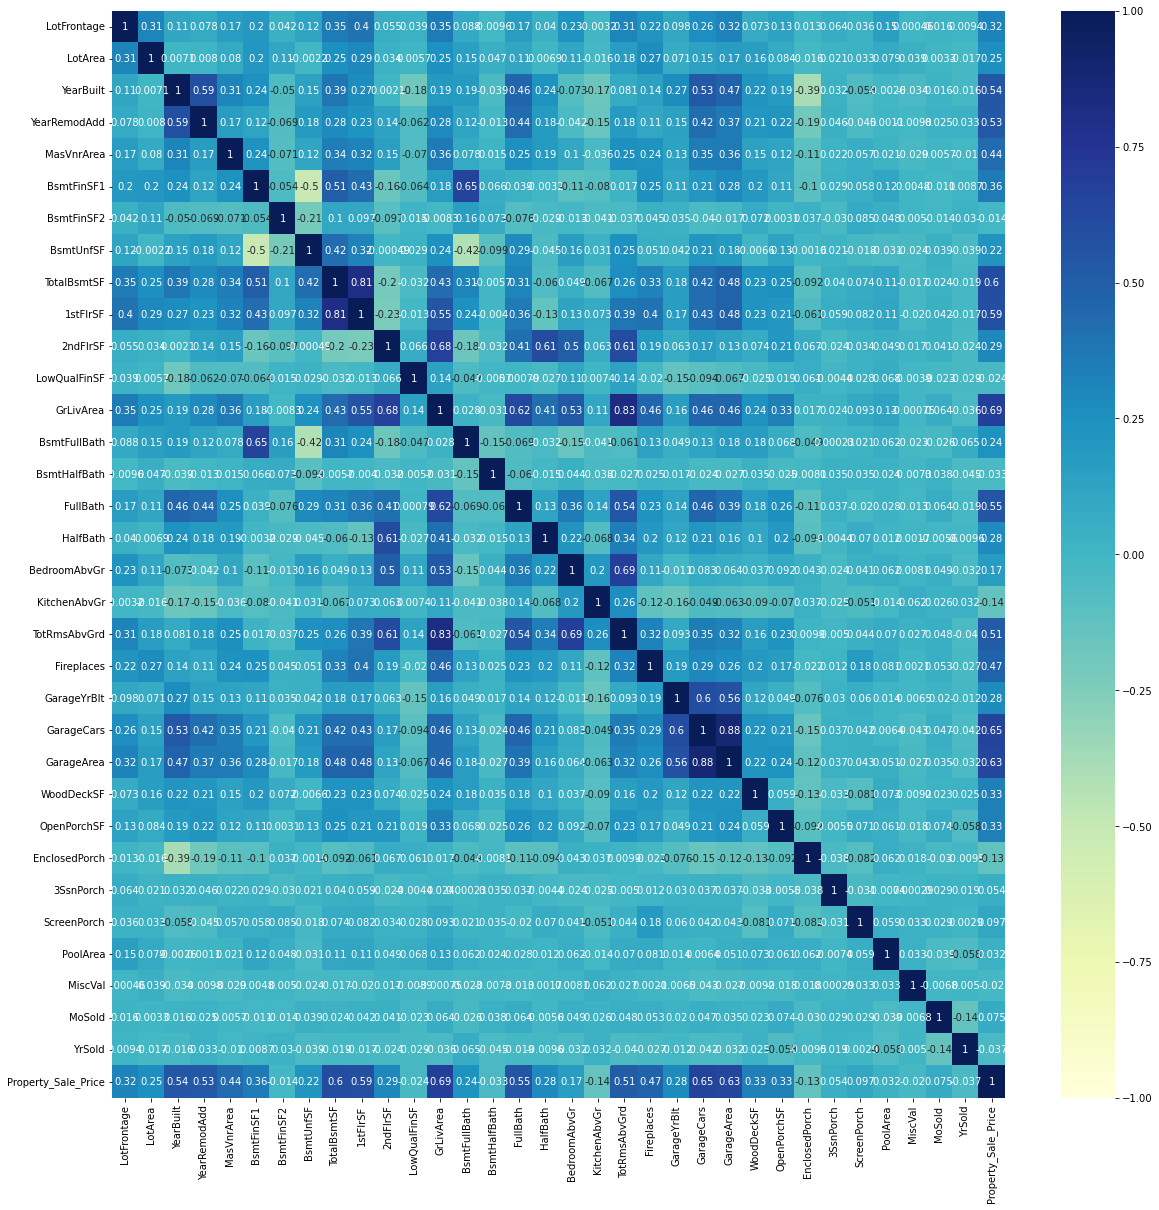

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot= True, vmin=1, vmax=-1, cmap="YlGnBu")
plt.show()

In [33]:
#Feature engineering...adding all Square feets into single columns
df_numeric_feature=df.select_dtypes(include=np.number)
df_numeric_features= df_numeric_feature.drop(['Property_Sale_Price'], axis=1)
df_numeric_features.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  
0         0        0       2    2008  
1         0        0       5    2007  
2         0        0       9    2008  
3         0        0       2    2006  
4         0        0      12    2008

In [34]:
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [35]:
df_numeric_features['Total_SF']=df_numeric_features['1stFlrSF']+df_numeric_features['TotalBsmtSF']+df_numeric_features['GrLivArea']+df_numeric_features['LowQualFinSF']+df_numeric_features['2ndFlrSF']+df_numeric_features['BsmtFinSF1']+df_numeric_features['BsmtFinSF2']+df_numeric_features['BsmtUnfSF']

df_numeric_features.drop(['1stFlrSF','TotalBsmtSF','GrLivArea','LowQualFinSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], inplace=True, axis=1)

df_numeric_features.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFullBath  \
0         65.0     8450       2003          2003       196.0             1   
1         80.0     9600       1976          1976         0.0             0   
2         68.0    11250       2001          2002       162.0             1   
3         60.0     9550       1915          1970         0.0             1   
4         84.0    14260       2000          2000       350.0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0           2         548           0           61   
1           1       1976.0           2         460         298            0   
2           1       2001.0           2         608           0           42   
3           1       1998.0           3         642           0           35   
4           1       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   Total_SF  
0      5132  
1      5048  
2      5412  
3      4946  
4      6686

In [36]:
df_numeric_features['Property_Sale_Price']=df['Property_Sale_Price']

### Analyzing relationship between features and target variables 

#### We'll use pair plot for analyzing particular numeric variables(selected form heatmap) VS target variables

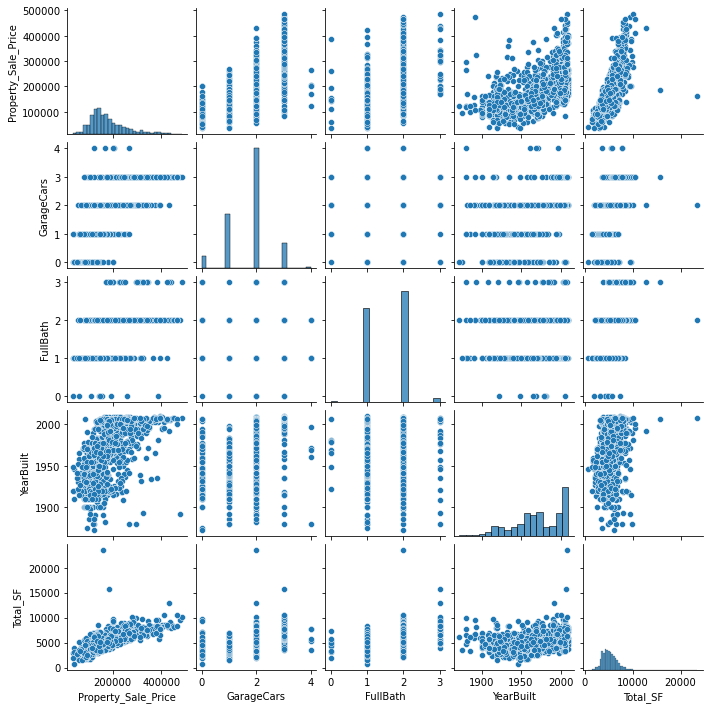

In [37]:
columns= ["Property_Sale_Price", "GarageCars", "FullBath", "YearBuilt", "Total_SF" ]
sns.pairplot(df_numeric_features[columns], kind="scatter" , height=2)
plt.show()

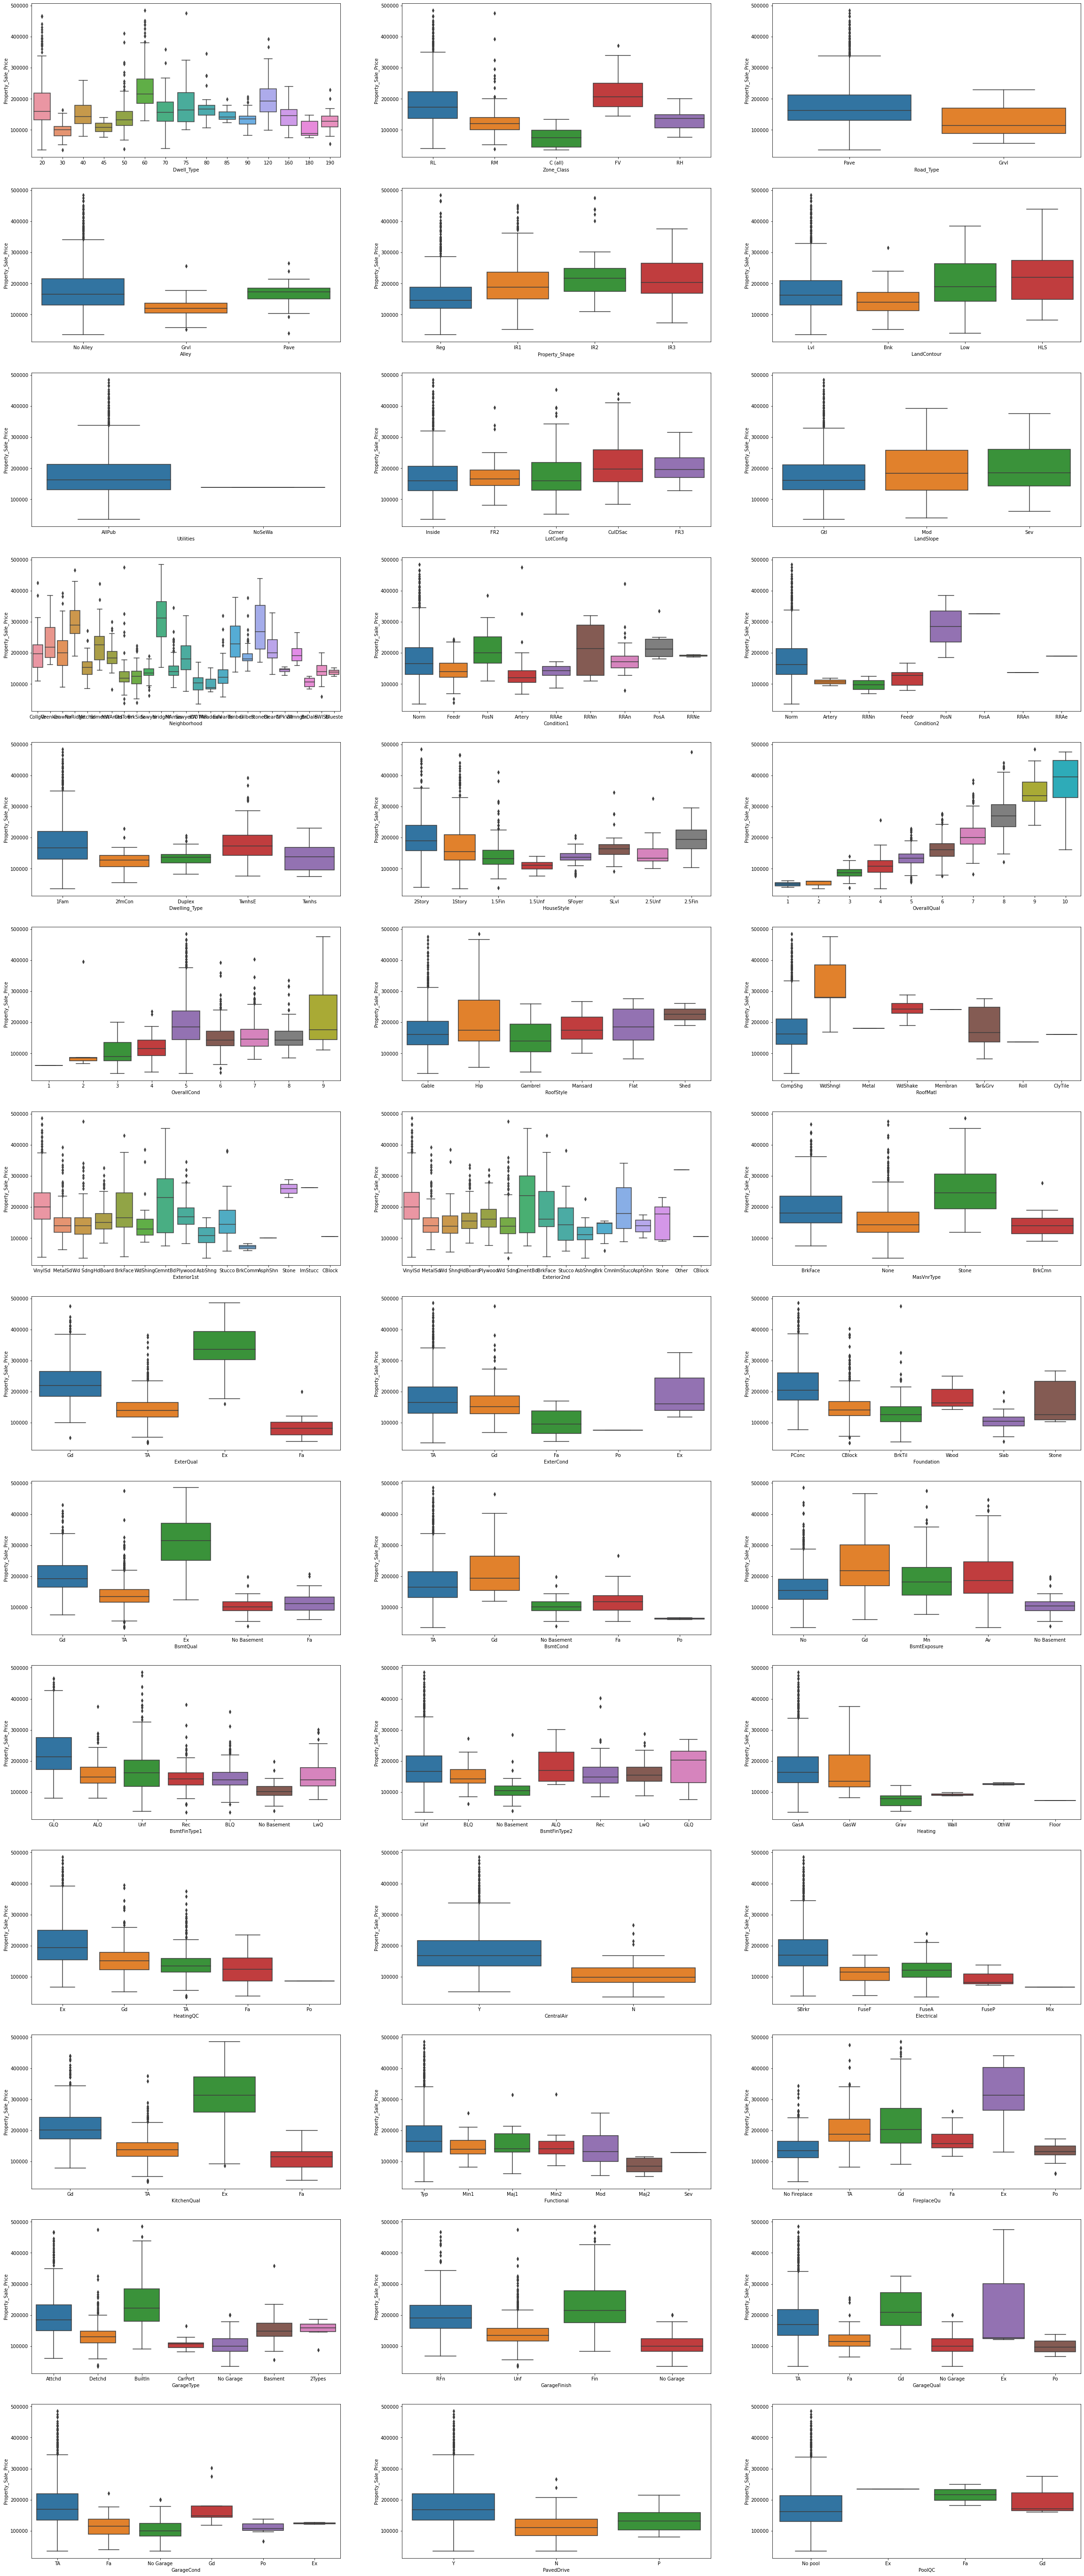

In [38]:
df_categorical_features=df.select_dtypes(include="object")

fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize = (40, 100))

# plot the boxplot for each categoric and target variable
for variable, subplot in zip(df_categorical_features, ax.flatten()):
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = df, ax = subplot)
    
plt.show()

Many of the categorivcal variables have effect on the sale price , also, the median sale price increases exponentially with overall quality

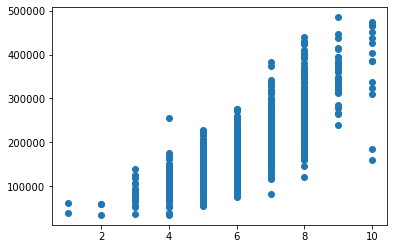

In [39]:
plt.scatter(df["OverallQual"],df["Property_Sale_Price"])

# Data Preparation

1.Check for normaility

2.dummy encoding of categorical variables

## Check for normality by plotting histogram and shapiro test

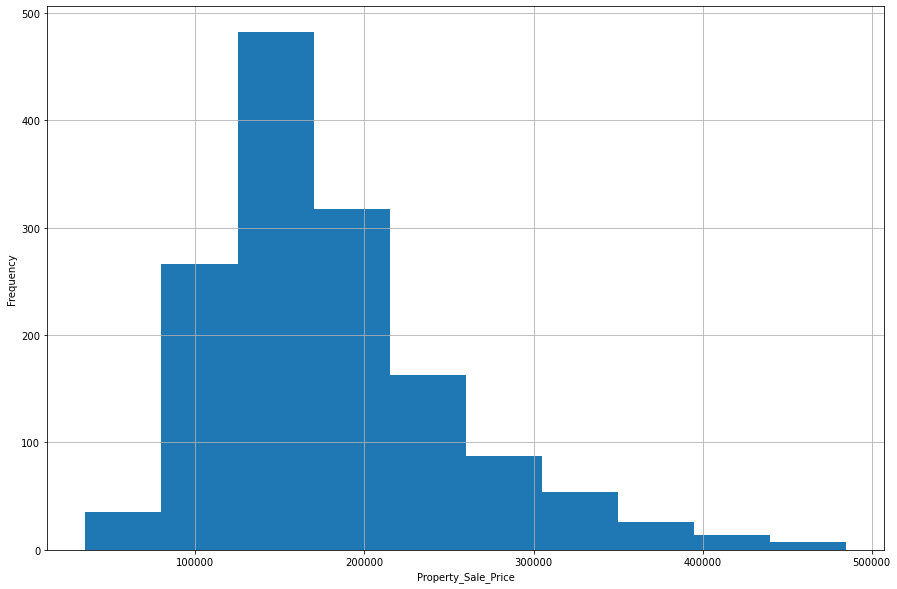

In [40]:
plt.figure(figsize=(15,10))
df["Property_Sale_Price"].hist()
plt.xlabel("Property_Sale_Price")
plt.ylabel("Frequency")
plt.show()

We can see that target variable is rightly skewed , thus we can visually say that target is variable is not normally distributed. So, we'll perform a shpiro test to check the normalilty. The null and alternative hypothesis is as follows:

                        H0 : Normally distributed
                        H1 : Not normally distributed

In [41]:
# normality test
stat, p = shapiro(df["Property_Sale_Price"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=0.919, p=0.000
Sample does not look normally distributed (reject H0)


  Use log transformation in order to reduce the skewness of the data and get near normally distributed data

In [42]:
df_numeric_features['log_Property_Sale_Price']= np.log(df["Property_Sale_Price"])
df.head()

Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type     Alley  \
0         60         RL         65.0     8450      Pave  No Alley   
1         20         RL         80.0     9600      Pave  No Alley   
2         60         RL         68.0    11250      Pave  No Alley   
3         70         RL         60.0     9550      Pave  No Alley   
4         60         RL         84.0    14260      Pave  No Alley   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle OverallQual OverallCond  \
0       Norm       Norm          1Fam     2Story           7           5   
1      Feedr       Norm          1Fam     1Story           6           8   
2       Norm       Norm          1Fam     2Story           7           5   
3       Norm       Norm          1Fam     2Story           7           5   
4       Norm       Norm          1Fam     2Story           8           5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             

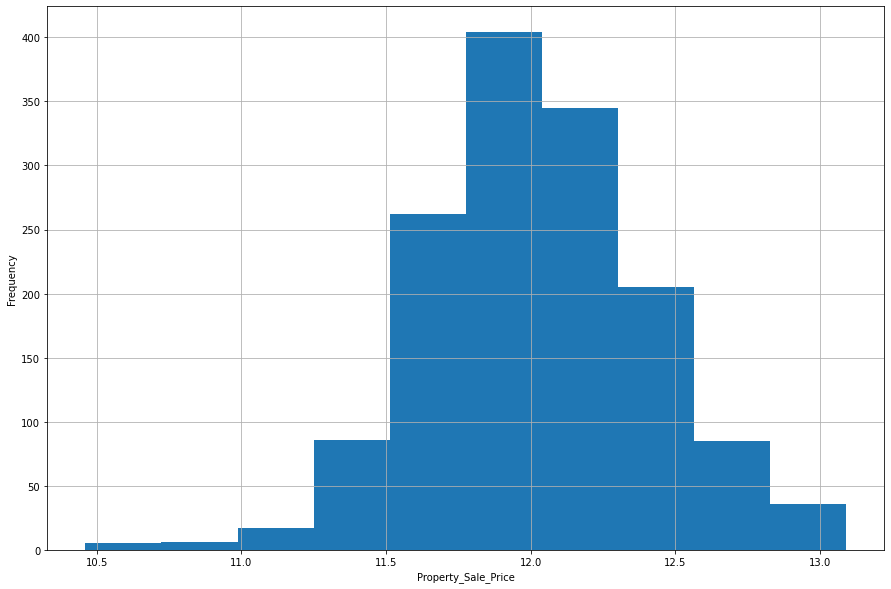

In [43]:
plt.figure(figsize=(15,10))
df_numeric_features["log_Property_Sale_Price"].hist()
plt.xlabel("Property_Sale_Price")
plt.ylabel("Frequency")
plt.show()

In [44]:
# normality test
stat, p = shapiro(df_numeric_features["log_Property_Sale_Price"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=0.992, p=0.000
Sample does not look normally distributed (reject H0)


It can be visually seen that data has nearly normally distributed but shapiro test does not support the claim

In [45]:
#skewness in the data
df_numeric_features["log_Property_Sale_Price"].skew()

-0.03836503763294778

## Dummy encoding

As OLS works only on the numeric data, dummt encoding in categoricak faetures is necessary.

Filtering out numerical and categorical data. Further spliting categorical data into nominal and ordinal data.

Performing one hot encoding for nominal data and label encoding for ordinal data

In [46]:
#numerical data
df_numeric_features.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFullBath  \
0         65.0     8450       2003          2003       196.0             1   
1         80.0     9600       1976          1976         0.0             0   
2         68.0    11250       2001          2002       162.0             1   
3         60.0     9550       1915          1970         0.0             1   
4         84.0    14260       2000          2000       350.0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0           2         548           0           61   
1           1       1976.0           2         460         298            0   
2           1       2001.0           2         608           0           42   
3           1       1998.0           3         642           0           35   
4           1       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   Total_SF  Property_Sale_Price  log_Property_Sale_Price  
0      5132               208500                12.247694  
1      5048               181500                12.109011  
2      5412               223500                12.317167  
3      4946               140000                11.849398  
4      6686               250000                12.429216

In [47]:
#filtering out ordinal data

df["OverallQual"]=df["OverallQual"].astype("category")
df["OverallCond"]= df["OverallCond"].astype("category")
df_ordinal=df.select_dtypes(include='category')

In [48]:
#filtering put nominal data
df_nominal= df.select_dtypes(include="object")
df_nominal.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
df=pd.concat([df_numeric_features,df_ordinal,df_nominal], axis=1)
df.shape

(1451, 74)

#### Dummy encode the categorical features

In [50]:
dummy_encoded_feature= pd.get_dummies(df_nominal, drop_first= True)
dummy_encoded_feature.head()

Dwell_Type_30  Dwell_Type_40  Dwell_Type_45  Dwell_Type_50  Dwell_Type_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   Dwell_Type_70  Dwell_Type_75  Dwell_Type_80  Dwell_Type_85  Dwell_Type_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   Dwell_Type_120  Dwell_Type_160  Dwell_Type_180  Dwell_Type_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Zone_Class_FV  Zone_Class_RH  Zone_Class_RL  Zone_Class_RM  Road_Type_Pave  \
0              0              0              1              0               1   
1              0              0              1              0               1   
2              0              0              1              0               1   
3              0              0              1              0               1   
4              0              0              1              0               1   

   Alley_No Alley  Alley_Pave  Property_Shape_IR2  Property_Shape_IR3  \
0               1           0                   0                   0   
1               1           0                   0                   0   
2               1           0                   0                   0   
3               1           0                   0                   0   
4               1           0                   0                   0   

   Property_Shape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0                   1                0                0                1   
1                   1                0                0                1   
2                   0                0                0                1   
3                   0                0                0                1   
4                   0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4        

In [51]:
dummy_encoded_feature.shape

(1451, 237)

In [52]:
# concatentaing the nominal, ordinal and numeric features

df_property_dummy= pd.concat([df_numeric_features,df_ordinal, dummy_encoded_feature], axis=1)

In [53]:
df_property_dummy.shape

(1451, 267)

In [54]:
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Total_SF', 'Property_Sale_Price',
       'log_Property_Sale_Price'],
      dtype='object')

In [55]:
df_property_dummy=sm.add_constant(df_property_dummy)

x=df_property_dummy.drop(['Property_Sale_Price' , 'log_Property_Sale_Price'], axis=1)
y=df_property_dummy[['Property_Sale_Price' , 'log_Property_Sale_Price']]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=1)

print("The shape of independent variables (X) in training data : ",x_train.shape)
print("The sheape of independent variables (X) in testing data : ",x_test.shape)
print("The shape of dependent variable (Y) in trianing data : ", y_train.shape)
print("The shape of dependent variable (Y) in testing data : " ,y_test.shape)

The shape of independent variables (X) in training data :  (972, 266)
The sheape of independent variables (X) in testing data :  (479, 266)
The shape of dependent variable (Y) in trianing data :  (972, 2)
The shape of dependent variable (Y) in testing data :  (479, 2)


C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [56]:
#feature scaling with satandardscaler

from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
scaled_feature_train=scaled.fit_transform(x_train)
scaled_feature_test=scaled.transform(x_test)

print(scaled_feature_train)

[[0.         0.06506849 0.05783262 ... 0.         1.         0.        ]
 [0.         0.16438356 0.08016079 ... 0.         0.         0.        ]
 [0.         0.16438356 0.03190072 ... 0.         1.         0.        ]
 ...
 [0.         0.19863014 0.03556989 ... 0.         1.         0.        ]
 [0.         0.15068493 0.03492954 ... 0.         1.         0.        ]
 [0.         0.07191781 0.0124518  ... 0.         1.         0.        ]]


# Linear Regression (OLS)

    1.Split the data into training and test data
    2.Build the model using training data
    3.Predict the model using test data
    4.Comnpute accuracy measures
    5.Tabulate the results

### Linear regression using statsmodel

In [57]:
#train the data using trawining data
ols_cfs= sm.OLS(y_train["log_Property_Sale_Price"], scaled_feature_train).fit()

ols_cfs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.951
Model:                                 OLS   Adj. R-squared:                  0.934
Method:                      Least Squares   F-statistic:                     55.79
Date:                     Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                             15:30:22   Log-Likelihood:                 1027.2
No. Observations:                      972   AIC:                            -1554.
Df Residuals:                          722   BIC:                            -334.5
Df Model:                              249                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.934e-14   9.07e-15      3.235      0.001    1.15e-14    4.71e-14
x1             0.1051      0.070      1.509      0.132      -0.032       0.242
x2             0.7177      0.128      5.613      0.000       0.467       0.969
x3             0.2704      0.064      4.218      0.000       0.145       0.396
x4             0.0536      0.019      2.876      0.004       0.017       0.090
x5             0.0328      0.054      0.609      0.543      -0.073       0.138
x6             0.0753      0.020      3.775      0.000       0.036       0.115
x7             0.0593      0.032      1.841      0.066      -0.004       0.122
x8             0.0787      0.038      2.062      0.040       0.004       0.154
x9             0.0440      0.022      1.988      0.047       0.001       0.087
x10            0.1348      0.063      2.127      0.034       0.010       0.259
x11           -0.0421      0.082     -0.513      0.608      -0.203       0.119
x12            0.0107      0.057      0.187      0.851      -0.102       0.123
x13            0.0498      0.042      1.194      0.233      -0.032       0.132
x14           -0.5376      0.700     -0.768      0.443      -1.912       0.837
x15            0.1264      0.053      2.401      0.017       0.023       0.230
x16            0.1574      0.065      2.404      0.016       0.029       0.286
x17            0.0376      0.025      1.504      0.133      -0.011       0.087
x18            0.0558      0.027      2.069      0.039       0.003       0.109
x19            0.1023      0.042      2.442      0.015       0.020       0.185
x20            0.0935      0.057      1.645      0.100      -0.018       0.205
x21            0.1002      0.032      3.117      0.002       0.037       0.163
x22            1.1350      0.817      1.390      0.165      -0.468       2.738
x23            0.7273      0.644      1.130      0.259      -0.536       1.991
x24            0.0160      0.015      1.071      0.285      -0.013       0.045
x25           -0.0175      0.012     -1.517      0.130      -0.040       0.005
x26            1.9303      0.140     13.810      0.000       1.656       2.205
x27            0.2877      0.051      5.593      0.000       0.187       0.389
x28            0.3205      0.038      8.360      0.000       0.245       0.396
x29           -0.0269      0.028     -0.961      0.337      -0.082       0.028
x30           -0.0406      0.091     -0.448      0.654      -0.218       0.137
x31           -0.3680      0.137     -2.689      0.007      -0.637      -0.099
x32            0.0172      0.047      0.367      0.714      -0.075       0.109
x33           -0.0390      0.041     -0.949      0.343      -0.120       0.042
x34            0.0153      0.045      0.342      0.732      -0.072       0.103
x35           -0.0437     

This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 2.35e+19 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 2.019 i.e. close to 2.0 and thus it indicates that there is no autocorrelation.

In [58]:
#predict the value using test data
ols_cfs_predict=ols_cfs.predict(scaled_feature_test)

y_pred=np.exp(ols_cfs_predict)
actual_property_sale_price=y_test["Property_Sale_Price"]

In [59]:
print(ols_cfs)

In [60]:

def metrics(model,name,actual,prediction,result_table):
    n=x_train.shape[0]
    k=x_train.shape[1]

    #compute the accuracy
    mean2e= mse(actual,prediction)
    rmse=math.sqrt(mean2e)
    mean_ae=mae(actual,prediction)
    if name=='Linear ols':
        rsquared=model.rsquared
        adj_rsquared=model.rsquared_adj
    else:
        
        rsquared= model.score(scaled_feature_train,y_train['Property_Sale_Price'])
        adj_rsquared=1 - (1-rsquared)*(n-1)/(n-k-1)
    

    metrics=pd.Series ({
        "Model" : name,
        "MAE" : mean_ae,
        "RMSE" : rmse,
        "R-Squared" : rsquared,
        "Adj R-Squared" : adj_rsquared
    })

    result_table= result_table.append(metrics, ignore_index=True)
    return result_table

In [61]:
result_table=pd.DataFrame(columns=['Model',"MAE", "RMSE", "R-Squared", "Adj R-Squared"])

result_table=metrics(ols_cfs,"Linear ols",actual_property_sale_price,y_pred,result_table)
print(result_table)

        Model           MAE          RMSE  R-Squared  Adj R-Squared
0  Linear ols  16908.302975  34870.500171   0.950598       0.933561


In [62]:
print(mae(actual_property_sale_price,y_pred))

16908.302974694285


# Linear regression with sgd

In [63]:
from sklearn.linear_model import SGDRegressor
model_2=SGDRegressor(max_iter=1000)
model_2.fit(scaled_feature_train,y_train['Property_Sale_Price'])
y_pred2=model_2.predict(scaled_feature_test)
y_pred2

array([301162.60846574, 145576.24560258, 137739.24126527, 414272.23557021,
       153636.79816839, 200174.36222402, 171918.09327805, 119329.50437216,
       109751.17590211, 204727.85391609,  93267.39653402, 149223.80454222,
       121791.66648329, 123935.70568826, 107763.62970418, 101710.3910135 ,
       116250.64856301,  91125.84853026, 235895.60192458, 154609.01599107,
       205554.35383202, 144846.09881466, 289832.96307484, 173217.03694535,
       310189.87948564, 205120.53985514, 113179.91471369, 191650.11837481,
       202782.68139484, 217029.804846  , 120204.59836182, 191273.0166358 ,
       162851.16852365, 342245.21254759, 347219.14617828, 179095.44081605,
       172142.38317495, 162176.83845151, 137214.60631261, 186469.17728568,
       119939.2286219 , 164104.3236276 ,  87846.25182029, 240679.43204784,
       107594.01638498, 147127.27101627, 236269.63477055, 100893.00246208,
       147041.97897448, 192250.28983186,  74827.71255136, 134159.01702915,
       186267.43818082, 2

In [64]:
result_table=metrics(model_2, "Linear SGD",y_test['Property_Sale_Price'],y_pred2,result_table )
print(result_table)

        Model           MAE          RMSE  R-Squared  Adj R-Squared
0  Linear ols  16908.302975  34870.500171   0.950598       0.933561
1  Linear SGD  18246.117828  26263.819878   0.894653       0.854905


# Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor
model_3=DecisionTreeRegressor(random_state=10)

tuned_param={
    
    "max_depth" : [5,10,20],
    'max_leaf_nodes':[10,20,30,40,50]
}
cv=RepeatedKFold(random_state=10)

gscv_dtr=GridSearchCV(estimator=model_3, param_grid=tuned_param, cv=5,n_jobs=1)

gscv_dtr.fit(scaled_feature_train,y_train['Property_Sale_Price'])
print(gscv_dtr.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 40}


In [66]:
model_3=DecisionTreeRegressor(max_depth=gscv_dtr.best_params_["max_depth"],max_leaf_nodes=gscv_dtr.best_params_['max_leaf_nodes'],random_state=10)
model_3.fit(scaled_feature_train,y_train['Property_Sale_Price'])
pred_3=model_3.predict(scaled_feature_test)
result_table=metrics(model_3,"Decision Tree", y_test['Property_Sale_Price'], pred_3,result_table)
print(result_table)

           Model           MAE          RMSE  R-Squared  Adj R-Squared
0     Linear ols  16908.302975  34870.500171   0.950598       0.933561
1     Linear SGD  18246.117828  26263.819878   0.894653       0.854905
2  Decision Tree  22595.137676  33073.626148   0.871583       0.823130


# Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor

# rf=RandomForestRegressor()

# #evaluation
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # Create the parameter grid based on the results of random search 
# params = {
#     'max_depth': [150,200],
#     'min_samples_leaf': [3, 5],
#     'min_samples_split': [8,12],
#     'max_features': [2, 3]
# }

# #randomizedsearch 
# search_rf = GridSearchCV(rf, params, n_jobs=-1, cv=cv)

# # execute search
# result_3 = search_rf.fit(scaled_feature_train, y_train['Property_Sale_Price'])
# # summarize result
# print(f'Best Score: {result_3.best_score_}')
# print(f'Best Parameters: {result_3.best_params_}')

In [68]:
# model_3=RandomForestRegressor(n_estimators=result_3.best_params_['n_estimators'],min_samples_leaf=result_3.best_params_['min_samples_leaf'],
#                                max_features=result_3.best_params_['max_features'],min_samples_split=result_3.best_params_['min_samples_split'],
#                               max_depth=result_3.best_params_['max_depth'])


model_3=RandomForestRegressor(random_state=10)
model_3=model_3.fit(scaled_feature_train,y_train['Property_Sale_Price'])
pred_3=model_3.predict(scaled_feature_test)
pred_3

array([266350.11, 118067.68, 115764.05, 397942.48, 159755.  , 201907.5 ,
       191401.25, 142322.95, 113430.  , 221188.62, 107430.51, 120309.58,
       119159.5 , 120089.63, 103720.66,  93248.  , 102677.03, 107712.  ,
       191263.6 , 152421.2 , 196962.37, 125378.3 , 331274.62, 165659.52,
       279738.08, 251721.61, 131115.49, 197851.11, 177314.03, 193846.76,
       124758.35, 227798.79, 174645.4 , 333906.41, 326716.03, 164236.82,
       174823.55, 144403.5 , 133546.  , 225200.62,  95491.54, 166989.59,
        94724.72, 227906.45,  90713.11, 151118.74, 266182.64,  99640.41,
       140510.93, 177242.7 ,  95692.83, 119893.04, 194324.  , 238390.55,
       151625.39, 181781.52, 111507.51, 371019.76,  94240.  , 166446.35,
       245397.8 , 138506.49, 168437.11, 113594.43, 182251.  , 151671.01,
       188331.8 , 277700.59, 126699.6 , 153752.06, 232017.09, 115422.1 ,
       169039.3 , 173855.4 , 212726.07, 334834.03, 293531.11, 138534.  ,
       187142.55, 138938.42, 251070.04, 198832.62, 

In [69]:
result_table=metrics(model_3,"Random Forest Regressor", y_test['Property_Sale_Price'],pred_3, result_table)
print(result_table)

                     Model           MAE          RMSE  R-Squared  \
0               Linear ols  16908.302975  34870.500171   0.950598   
1               Linear SGD  18246.117828  26263.819878   0.894653   
2            Decision Tree  22595.137676  33073.626148   0.871583   
3  Random Forest Regressor  16163.464071  24685.594725   0.977486   

   Adj R-Squared  
0       0.933561  
1       0.854905  
2       0.823130  
3       0.968991  


# KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor
model_4=KNeighborsRegressor()
params={
    'n_neighbors' : np.arange(1,24,2),
    'metric': ['hamming','euclidean','manhattan','Chebyshev']
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search_knn=GridSearchCV(estimator=model_4,param_grid=params, cv=cv,scoring='accuracy')
result_4 = search_knn.fit(scaled_feature_train, y_train['Property_Sale_Price'])
# summarize result
print(f'Best Score: {result_4.best_score_}')
print(f'Best Parameters: {result_4.best_params_}')

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\metrics\_classific

Best Score: 0.012679711059681603
Best Parameters: {'metric': 'hamming', 'n_neighbors': 1}


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 213, in fit
    return self._fit(X, y)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\

In [71]:
result_4.best_params_

{'metric': 'hamming', 'n_neighbors': 1}

In [72]:
for i in np.arange(1,150,2):
    

    knn = KNeighborsRegressor(i, metric = 'hamming')

    score = cross_val_score(knn, scaled_feature_train, y_train['Property_Sale_Price'], cv = 5)

    score = score.mean()
    
    
    print(f'{i} == {score}')

1 == 0.6037779086659495
3 == 0.7133924355988832
5 == 0.7199690344609555
7 == 0.7310064193479521
9 == 0.733504791661628
11 == 0.7334053019376924
13 == 0.7325869501286391
15 == 0.728314103737355
17 == 0.7275465959289728
19 == 0.7251253456535904
21 == 0.7183236700754126
23 == 0.7135665558623472
25 == 0.7104764996246857
27 == 0.7054425644960532
29 == 0.6999248636342899
31 == 0.6962653544348363
33 == 0.6941563220355844
35 == 0.6894631614545809
37 == 0.6864603224652501
39 == 0.6837241941811107
41 == 0.6820081719757052
43 == 0.679738684185231
45 == 0.6754560436965285
47 == 0.6711075756249024
49 == 0.6699840043042035
51 == 0.6684514668887301
53 == 0.6656993092626993
55 == 0.6637731456359666
57 == 0.660482960883734
59 == 0.6590886139308713
61 == 0.6567037361990209
63 == 0.6533275873875866
65 == 0.6511707379808942
67 == 0.6487643654249522
69 == 0.6478964754293823
71 == 0.6461608008064514
73 == 0.6454931357775424
75 == 0.6429941221126791
77 == 0.6411736399868013
79 == 0.6398875670953472
81 == 0.6

In [73]:
model_4=KNeighborsRegressor(n_neighbors=5)
model_4.fit(scaled_feature_train,y_train['Property_Sale_Price'])
y_pred_4=model_4.predict(scaled_feature_test)
y_pred_4

array([386598.8, 139980. ,  93700. , 361200. , 142750. , 227000. ,
       163560. , 129300. , 137550. , 190480. , 115040. , 161770. ,
       133850. , 112975. , 107700. , 101400. , 114180. , 104600. ,
       225600. , 132560. , 248300. , 134700. , 281086.4, 132500. ,
       358821.2, 236180. , 139320. , 211880. , 145240. , 207760. ,
       126850. , 208370. , 182300. , 323392.6, 354752.2, 142140. ,
       149900. , 130700. , 148900. , 191160. ,  99362.2, 154760. ,
       101180. , 248350. , 116096. , 139200. , 234600. ,  93580. ,
       115922.2, 186660. , 101880. , 118200. , 159130. , 269400. ,
       161580. , 180180. , 114280. , 348038.4, 119480. , 152248. ,
       197920. , 143080. , 184373. , 125440. , 207380. , 163890. ,
       215080. , 196810. , 123000. , 230980. , 194699. , 127820. ,
       204460. , 136100. , 210200. , 404446.2, 275500. , 134050. ,
       147520. , 141400. , 210400. , 196379. , 182560. , 183641.4,
       140180. , 163100. , 123680. , 251800. , 174500. , 18409

In [74]:
result_table=metrics(model_4,"KNN",y_test['Property_Sale_Price'],y_pred_4,result_table)
print(result_table)

                     Model           MAE          RMSE  R-Squared  \
0               Linear ols  16908.302975  34870.500171   0.950598   
1               Linear SGD  18246.117828  26263.819878   0.894653   
2            Decision Tree  22595.137676  33073.626148   0.871583   
3  Random Forest Regressor  16163.464071  24685.594725   0.977486   
4                      KNN  24815.260543  37348.662155   0.809449   

   Adj R-Squared  
0       0.933561  
1       0.854905  
2       0.823130  
3       0.968991  
4       0.737553  


# AdaBoostRegressor

In [75]:
from sklearn.ensemble import AdaBoostRegressor


model_5=AdaBoostRegressor(random_state=10)
model_5=model_5.fit(scaled_feature_train,y_train['Property_Sale_Price'])
y_pred_5=model_5.predict(scaled_feature_test)
y_pred_5

array([295120.43661972, 132592.17241379, 138683.03384615, 389647.74137931,
       148571.3313253 , 195560.18032787, 192407.91666667, 135121.93559322,
       117230.71686747, 208136.47004608, 123320.51282051, 126470.64646465,
       120251.98630137, 142814.24367089, 112357.24528302, 120251.98630137,
       123320.51282051, 116464.72427984, 208422.66666667, 137868.85808581,
       208987.81775701, 123320.51282051, 329999.4969697 , 148096.48895899,
       310310.53921569, 262959.04968944, 138683.03384615, 195407.73732719,
       160464.23529412, 193943.07142857, 136937.32      , 212377.3190184 ,
       160464.23529412, 335861.2578125 , 327675.86138614, 162396.74358974,
       162396.74358974, 132592.17241379, 121682.50980392, 216397.42471042,
       123320.51282051, 146770.        , 112357.24528302, 235187.28169014,
       117230.71686747, 140861.6512605 , 230487.75510204, 135121.93559322,
       132966.        , 204864.6561086 , 118024.45054945, 126470.64646465,
       158228.00724638, 2

In [76]:
result_table=metrics(model_5,"AdaBoostRegressor",y_test['Property_Sale_Price'],y_pred_5,result_table)
print(result_table)

                     Model           MAE          RMSE  R-Squared  \
0               Linear ols  16908.302975  34870.500171   0.950598   
1               Linear SGD  18246.117828  26263.819878   0.894653   
2            Decision Tree  22595.137676  33073.626148   0.871583   
3  Random Forest Regressor  16163.464071  24685.594725   0.977486   
4                      KNN  24815.260543  37348.662155   0.809449   
5        AdaBoostRegressor  22679.497694  30746.508286   0.877314   

   Adj R-Squared  
0       0.933561  
1       0.854905  
2       0.823130  
3       0.968991  
4       0.737553  
5       0.831025  


# XGBoost Regressor

In [77]:
import xgboost as xgb
model_6=xgb.XGBRegressor(random_state=10)
model_6.fit(scaled_feature_train,y_train['Property_Sale_Price'])
y_pred_6=model_6.predict(scaled_feature_test)
result_table=metrics(model_6,"XGBOOST", y_test['Property_Sale_Price'], y_pred_6,result_table)
print(result_table)

                     Model           MAE          RMSE  R-Squared  \
0               Linear ols  16908.302975  34870.500171   0.950598   
1               Linear SGD  18246.117828  26263.819878   0.894653   
2            Decision Tree  22595.137676  33073.626148   0.871583   
3  Random Forest Regressor  16163.464071  24685.594725   0.977486   
4                      KNN  24815.260543  37348.662155   0.809449   
5        AdaBoostRegressor  22679.497694  30746.508286   0.877314   
6                  XGBOOST  16207.713987  23793.978730   0.999737   

   Adj R-Squared  
0       0.933561  
1       0.854905  
2       0.823130  
3       0.968991  
4       0.737553  
5       0.831025  
6       0.999638  


In [78]:
from catboost import CatBoostRegressor
model_7=CatBoostRegressor(random_state=10)
model_7.fit(scaled_feature_train, y_train['Property_Sale_Price'])
y_pred_7=model_7.predict(scaled_feature_test)
result_table=metrics(model_7,"CAT boost",y_test['Property_Sale_Price'],y_pred_7,result_table)
print(result_table)

Learning rate set to 0.04076
0:	learn: 68902.3336605	total: 72.1ms	remaining: 1m 12s
1:	learn: 67174.0300227	total: 76.3ms	remaining: 38.1s
2:	learn: 65627.8173165	total: 80.8ms	remaining: 26.8s
3:	learn: 64007.0193812	total: 86.3ms	remaining: 21.5s
4:	learn: 62540.3058817	total: 91.8ms	remaining: 18.3s
5:	learn: 60905.7765461	total: 95.3ms	remaining: 15.8s
6:	learn: 59652.0677070	total: 98.7ms	remaining: 14s
7:	learn: 58290.0479943	total: 104ms	remaining: 12.9s
8:	learn: 56851.6414966	total: 107ms	remaining: 11.8s
9:	learn: 55511.0878551	total: 111ms	remaining: 10.9s
10:	learn: 54315.8025175	total: 114ms	remaining: 10.3s
11:	learn: 53014.0829349	total: 121ms	remaining: 9.93s
12:	learn: 51813.4369833	total: 125ms	remaining: 9.46s
13:	learn: 50676.2875314	total: 128ms	remaining: 9.02s
14:	learn: 49623.3682384	total: 133ms	remaining: 8.73s
15:	learn: 48618.8585873	total: 137ms	remaining: 8.41s
16:	learn: 47666.8965887	total: 140ms	remaining: 8.12s
17:	learn: 46716.5008433	total: 145ms	re

188:	learn: 16659.4638266	total: 814ms	remaining: 3.49s
189:	learn: 16616.2091886	total: 818ms	remaining: 3.49s
190:	learn: 16570.4881965	total: 822ms	remaining: 3.48s
191:	learn: 16533.1735561	total: 826ms	remaining: 3.48s
192:	learn: 16505.3131842	total: 831ms	remaining: 3.47s
193:	learn: 16473.2861866	total: 835ms	remaining: 3.47s
194:	learn: 16438.2909300	total: 839ms	remaining: 3.46s
195:	learn: 16401.6028751	total: 843ms	remaining: 3.46s
196:	learn: 16383.2007803	total: 847ms	remaining: 3.45s
197:	learn: 16341.2622295	total: 851ms	remaining: 3.45s
198:	learn: 16305.0357665	total: 855ms	remaining: 3.44s
199:	learn: 16277.5730852	total: 858ms	remaining: 3.43s
200:	learn: 16229.1345706	total: 862ms	remaining: 3.43s
201:	learn: 16187.9511682	total: 866ms	remaining: 3.42s
202:	learn: 16170.0660044	total: 870ms	remaining: 3.41s
203:	learn: 16140.3102015	total: 874ms	remaining: 3.41s
204:	learn: 16097.6420567	total: 878ms	remaining: 3.4s
205:	learn: 16058.0622907	total: 881ms	remaining:

346:	learn: 12269.2120699	total: 1.49s	remaining: 2.8s
347:	learn: 12251.6012703	total: 1.5s	remaining: 2.8s
348:	learn: 12234.9448859	total: 1.5s	remaining: 2.8s
349:	learn: 12211.4452430	total: 1.5s	remaining: 2.79s
350:	learn: 12205.6000861	total: 1.51s	remaining: 2.79s
351:	learn: 12184.1899861	total: 1.51s	remaining: 2.79s
352:	learn: 12169.4151560	total: 1.52s	remaining: 2.79s
353:	learn: 12139.4253896	total: 1.52s	remaining: 2.78s
354:	learn: 12115.3376486	total: 1.53s	remaining: 2.78s
355:	learn: 12090.4415618	total: 1.53s	remaining: 2.77s
356:	learn: 12068.2561419	total: 1.54s	remaining: 2.77s
357:	learn: 12050.6574556	total: 1.54s	remaining: 2.77s
358:	learn: 12031.2708439	total: 1.55s	remaining: 2.76s
359:	learn: 12003.8494639	total: 1.55s	remaining: 2.76s
360:	learn: 11976.0950187	total: 1.56s	remaining: 2.76s
361:	learn: 11950.7121307	total: 1.56s	remaining: 2.75s
362:	learn: 11942.6117148	total: 1.57s	remaining: 2.75s
363:	learn: 11920.1729070	total: 1.57s	remaining: 2.75

529:	learn: 9131.5584579	total: 2.33s	remaining: 2.07s
530:	learn: 9117.9083908	total: 2.34s	remaining: 2.06s
531:	learn: 9100.6512726	total: 2.34s	remaining: 2.06s
532:	learn: 9077.5895577	total: 2.35s	remaining: 2.05s
533:	learn: 9063.4405177	total: 2.35s	remaining: 2.05s
534:	learn: 9050.0136018	total: 2.35s	remaining: 2.05s
535:	learn: 9026.4939151	total: 2.36s	remaining: 2.04s
536:	learn: 9018.9197935	total: 2.36s	remaining: 2.04s
537:	learn: 9006.9082683	total: 2.37s	remaining: 2.03s
538:	learn: 8995.8785843	total: 2.37s	remaining: 2.03s
539:	learn: 8993.7042312	total: 2.38s	remaining: 2.03s
540:	learn: 8985.9959616	total: 2.38s	remaining: 2.02s
541:	learn: 8971.3269506	total: 2.39s	remaining: 2.02s
542:	learn: 8965.6589879	total: 2.39s	remaining: 2.01s
543:	learn: 8954.0032758	total: 2.4s	remaining: 2.01s
544:	learn: 8944.2946109	total: 2.4s	remaining: 2.01s
545:	learn: 8926.5360403	total: 2.41s	remaining: 2s
546:	learn: 8922.4410783	total: 2.41s	remaining: 2s
547:	learn: 8899.3

711:	learn: 7065.6879792	total: 3.18s	remaining: 1.28s
712:	learn: 7057.3481910	total: 3.18s	remaining: 1.28s
713:	learn: 7052.8284754	total: 3.19s	remaining: 1.28s
714:	learn: 7050.7138896	total: 3.19s	remaining: 1.27s
715:	learn: 7045.2992317	total: 3.2s	remaining: 1.27s
716:	learn: 7040.5946234	total: 3.2s	remaining: 1.26s
717:	learn: 7031.2769750	total: 3.21s	remaining: 1.26s
718:	learn: 7022.5871096	total: 3.21s	remaining: 1.25s
719:	learn: 7013.7560266	total: 3.21s	remaining: 1.25s
720:	learn: 7005.9946202	total: 3.22s	remaining: 1.25s
721:	learn: 6999.9345142	total: 3.22s	remaining: 1.24s
722:	learn: 6991.4836464	total: 3.23s	remaining: 1.24s
723:	learn: 6989.8454278	total: 3.23s	remaining: 1.23s
724:	learn: 6982.7197559	total: 3.24s	remaining: 1.23s
725:	learn: 6971.9514475	total: 3.24s	remaining: 1.22s
726:	learn: 6958.8828728	total: 3.25s	remaining: 1.22s
727:	learn: 6957.7814737	total: 3.25s	remaining: 1.21s
728:	learn: 6950.3416770	total: 3.26s	remaining: 1.21s
729:	learn: 

899:	learn: 5617.0346181	total: 4.02s	remaining: 447ms
900:	learn: 5613.8891201	total: 4.03s	remaining: 443ms
901:	learn: 5605.8061830	total: 4.03s	remaining: 438ms
902:	learn: 5597.5531852	total: 4.04s	remaining: 434ms
903:	learn: 5589.3585974	total: 4.04s	remaining: 429ms
904:	learn: 5588.6269083	total: 4.05s	remaining: 425ms
905:	learn: 5579.9960846	total: 4.05s	remaining: 420ms
906:	learn: 5572.9643875	total: 4.06s	remaining: 416ms
907:	learn: 5563.8476361	total: 4.06s	remaining: 411ms
908:	learn: 5557.7484069	total: 4.06s	remaining: 407ms
909:	learn: 5549.5627443	total: 4.07s	remaining: 402ms
910:	learn: 5540.8968779	total: 4.07s	remaining: 398ms
911:	learn: 5536.7479525	total: 4.08s	remaining: 394ms
912:	learn: 5531.7609453	total: 4.08s	remaining: 389ms
913:	learn: 5525.7035678	total: 4.09s	remaining: 385ms
914:	learn: 5517.7142003	total: 4.09s	remaining: 380ms
915:	learn: 5511.5034937	total: 4.1s	remaining: 376ms
916:	learn: 5500.6129565	total: 4.1s	remaining: 371ms
917:	learn: 

In [79]:
data.head()

Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley Property_Shape  \
0         60         RL         65.0     8450      Pave   NaN            Reg   
1         20         RL         80.0     9600      Pave   NaN            Reg   
2         60         RL         68.0    11250      Pave   NaN            IR1   
3         70         RL         60.0     9550      Pave   NaN            IR1   
4         60         RL         84.0    14260      Pave   NaN            IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 Dwelling_Type HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm          1Fam     2Story           7           5       2003   
1       Norm          1Fam     1Story           6           8       1976   
2       Norm          1Fam     2Story           7           5       2001   
3       Norm          1Fam     2Story           7           5       1915   
4       Norm          1Fam     2Story           8           5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1

In [80]:
df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFullBath  \
0         65.0     8450       2003          2003       196.0             1   
1         80.0     9600       1976          1976         0.0             0   
2         68.0    11250       2001          2002       162.0             1   
3         60.0     9550       1915          1970         0.0             1   
4         84.0    14260       2000          2000       350.0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0           2         548           0           61   
1           1       1976.0           2         460         298            0   
2           1       2001.0           2         608           0           42   
3           1       1998.0           3         642           0           35   
4           1       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   Total_SF  Property_Sale_Price  log_Property_Sale_Price OverallQual  \
0      5132               208500                12.247694           7   
1      5048               181500                12.109011           6   
2      5412               223500                12.317167           7   
3      4946               140000                11.849398           7   
4      6686               250000                12.429216           8   

  OverallCond Dwell_Type Zone_Class Road_Type     Alley Property_Shape  \
0           5         60         RL      Pave  No Alley            Reg   
1           8         20         RL      Pave  No Alley            Reg   
2           5         60         RL      Pave  No Alley            IR1   
3           5         70         RL      Pave  No Alley            IR1   
4           5         60         RL      Pave  No Alley            IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 Dwelling_Type HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm          1Fam     2Story     Gable  CompShg     VinylSd   
1       Norm          1Fam     1Story     Gable  CompShg     MetalSd   
2       Norm          1Fam     2Story     Gable  CompShg     VinylSd   
3       Norm          1Fam     2Story     Gable  CompShg     Wd Sdng   
4       Norm          1Fam     2Story     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3     Wd Shng       None        TA        TA 

In [81]:
test=scaled_feature_test[1]

In [82]:
print(scaled_feature_test.shape)
print(scaled_feature_train.shape)

(479, 266)
(972, 266)


In [83]:
#testing a single feature

test=scaled_feature_test[0]
test=pd.DataFrame(test)
test=np.transpose(test)
test.shape

(1, 266)

In [84]:
print(y_test.iloc[0])
model_6.predict(test)

Property_Sale_Price        290000.000000
log_Property_Sale_Price        12.577636
Name: 1209, dtype: float64


array([277511.6], dtype=float32)

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=xgb.XGBRegressor(), n_features_to_select=25)

rfe.fit(x_train,y_train['Property_Sale_Price'])

RFE(estimator=XGBRegressor(base_score=None, booster=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, enable_categorical=False,
                           gamma=None, gpu_id=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_delta_step=None, max_depth=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=None, num_parallel_tree=None, predictor=None,
                           random_state=None, reg_alpha=None, reg_lambda=None,
                           scale_pos_weight=None, subsample=None,
                           tree_method=None, validate_parameters=None,
                           verbosity=None),
    n_features_to_select=25)

In [87]:
imp_features=[]
for i in zip(x,rfe.get_support()):
    if i[1]==True:
        imp_features.append(i[0])
        
print(imp_features)

['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'Total_SF', 'OverallQual', 'OverallCond', 'Dwell_Type_30', 'Dwell_Type_60', 'Zone_Class_RL', 'LandContour_HLS', 'Neighborhood_Crawfor', 'Neighborhood_NAmes', 'Neighborhood_OldTown', 'BsmtExposure_Gd', 'BsmtExposure_No', 'CentralAir_Y', 'KitchenQual_TA', 'Functional_Min1', 'Functional_Typ', 'SaleType_New', 'SaleCondition_Family']


In [88]:
imp_features=['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'Total_SF', 'OverallQual', 'OverallCond', 'Dwell_Type', 'Zone_Class',  'Neighborhood', 'Exterior1st', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'Functional', 'SaleType']
imp_features_df=df[imp_features]
imp_features_df.head()

YearBuilt  YearRemodAdd  BsmtFullBath  KitchenAbvGr  Fireplaces  \
0       2003          2003             1             1           0   
1       1976          1976             0             1           1   
2       2001          2002             1             1           1   
3       1915          1970             1             1           1   
4       2000          2000             1             1           1   

   GarageCars  Total_SF OverallQual OverallCond Dwell_Type Zone_Class  \
0           2      5132           7           5         60         RL   
1           2      5048           6           8         20         RL   
2           2      5412           7           5         60         RL   
3           3      4946           7           5         70         RL   
4           3      6686           8           5         60         RL   

  Neighborhood Exterior1st BsmtExposure CentralAir KitchenQual Functional  \
0      CollgCr     VinylSd           No          Y          Gd        Typ   
1      Veenker     MetalSd           Gd          Y          TA        Typ   
2      CollgCr     VinylSd           Mn          Y          Gd        Typ   
3      Crawfor     Wd Sdng           No          Y          Gd        Typ   
4      NoRidge     VinylSd           Av          Y          Gd        Typ   

  SaleType  
0       WD  
1       WD  
2       WD  
3       WD  
4       WD

In [89]:
imp_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   YearBuilt     1451 non-null   int64   
 1   YearRemodAdd  1451 non-null   int64   
 2   BsmtFullBath  1451 non-null   int64   
 3   KitchenAbvGr  1451 non-null   int64   
 4   Fireplaces    1451 non-null   int64   
 5   GarageCars    1451 non-null   int64   
 6   Total_SF      1451 non-null   int64   
 7   OverallQual   1451 non-null   category
 8   OverallCond   1451 non-null   category
 9   Dwell_Type    1451 non-null   object  
 10  Zone_Class    1451 non-null   object  
 11  Neighborhood  1451 non-null   object  
 12  Exterior1st   1451 non-null   object  
 13  BsmtExposure  1451 non-null   object  
 14  CentralAir    1451 non-null   object  
 15  KitchenQual   1451 non-null   object  
 16  Functional    1451 non-null   object  
 17  SaleType      1451 non-null   object  
dtypes: categ

In [90]:
imp_numeric=imp_features_df.select_dtypes(np.number)
imp_category=imp_features_df.select_dtypes('category')
imp_object=imp_features_df.select_dtypes('object')
dummy=pd.get_dummies(imp_object, drop_first=True)
features=pd.concat([imp_numeric,imp_category,dummy], axis=1)


In [91]:
features.head()

YearBuilt  YearRemodAdd  BsmtFullBath  KitchenAbvGr  Fireplaces  \
0       2003          2003             1             1           0   
1       1976          1976             0             1           1   
2       2001          2002             1             1           1   
3       1915          1970             1             1           1   
4       2000          2000             1             1           1   

   GarageCars  Total_SF OverallQual OverallCond  Dwell_Type_30  Dwell_Type_40  \
0           2      5132           7           5              0              0   
1           2      5048           6           8              0              0   
2           2      5412           7           5              0              0   
3           3      4946           7           5              0              0   
4           3      6686           8           5              0              0   

   Dwell_Type_45  Dwell_Type_50  Dwell_Type_60  Dwell_Type_70  Dwell_Type_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   Dwell_Type_80  Dwell_Type_85  Dwell_Type_90  Dwell_Type_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   Dwell_Type_160  Dwell_Type_180  Dwell_Type_190  Zone_Class_FV  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   Zone_Class_RH  Zone_Class_RL  Zone_Class_RM  Neighborhood_Blueste  \
0              0              1              0                     0   
1              0              1              0                     0   
2              0              1              0                     0   
3              0              1              0                     0   
4              0              1              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0              

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,y['Property_Sale_Price'], test_size=0.3,random_state=10)

In [186]:
!pip install xgboost

In [190]:
xgb.__version__

'1.5.1'

In [106]:
from sklearn.pipeline import Pipeline
model_pipe=Pipeline([('scaler' , MinMaxScaler()),
                        ('cat',  xgb.XGBRegressor())])

model_pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('cat',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [107]:
y_pred=model_pipe.predict(x_test)

In [108]:
y_test

651     108000
1340    123000
868     169000
1319    111000
35      309000
299     158500
916      35311
385     192000
1135    102000
972      99500
145     130000
1018    160000
938     239799
74      107400
1438    149700
371     134432
1020    176000
566     325000
56      172500
1051    200141
428     195400
721     143000
741     142000
432     122500
1283    139000
821      93000
370     172400
125      84500
1400    120000
1292    107500
1403    282922
623     168500
645     143250
833     167000
850     131500
748     260400
1268    381000
1001     86000
674     140000
1425    142000
963     239000
1014    119200
1171    163000
1422    136500
1411    140000
7       200000
373     123000
262     151000
1259    151000
87      164500
516     158000
418     126000
1217    229456
1103    159500
131     244000
578     146000
955     145000
514      96500
848     240000
541     248000
552     255500
456      98000
31      149350
1270    260000
726     222000
767     160000
961     27

In [109]:
print(mse(y_pred,y_test))
print(rmse(y_pred,y_test))
print(mae(y_pred,y_test))

499795436.003254
22356.10511702014
15529.384353497706


In [110]:
result_table

Model           MAE          RMSE  R-Squared  \
0               Linear ols  16908.302975  34870.500171   0.950598   
1               Linear SGD  18246.117828  26263.819878   0.894653   
2            Decision Tree  22595.137676  33073.626148   0.871583   
3  Random Forest Regressor  16163.464071  24685.594725   0.977486   
4                      KNN  24815.260543  37348.662155   0.809449   
5        AdaBoostRegressor  22679.497694  30746.508286   0.877314   
6                  XGBOOST  16207.713987  23793.978730   0.999737   
7                CAT boost  14447.457990  21665.555316   0.994933   

   Adj R-Squared  
0       0.933561  
1       0.854905  
2       0.823130  
3       0.968991  
4       0.737553  
5       0.831025  
6       0.999638  
7       0.993021

In [111]:
model_pipe.score(x_train,y_train)

0.9985108224888531

In [112]:
#saving the model

import pickle
filename='property.pkl'
pickle.dump(model_pipe,open(filename,'wb'))

In [113]:
model=pickle.load(open('property.pkl','rb'))
model.predict(x_test)

array([135616.83 , 132769.95 , 166394.34 , 102467.01 , 307182.12 ,
       163601.34 ,  80668.68 , 187629.89 , 110450.555, 123214.59 ,
       147060.08 , 161761.08 , 240598.33 , 125453.23 , 152839.14 ,
       122768.945, 153762.67 , 344881.44 , 200134.97 , 173895.42 ,
       193116.83 , 143946.89 , 144278.45 , 122971.586, 133819.94 ,
       103415.55 , 184028.48 ,  74513.63 , 109572.625, 117853.16 ,
       236700.95 , 161625.94 , 137104.9  , 182509.75 , 141903.52 ,
       255763.47 , 373609.3  ,  94646.83 , 148849.75 , 151180.84 ,
       290760.3  , 121084.3  , 166742.77 , 141903.52 , 133351.77 ,
       236017.   , 133564.17 , 158556.36 , 158082.2  , 172582.92 ,
       166006.78 , 111717.88 , 252647.56 , 143030.55 , 199638.45 ,
       167617.3  , 175789.33 , 106310.734, 195278.94 , 248208.61 ,
       275043.75 , 109342.89 , 152924.27 , 197271.4  , 218596.88 ,
       153536.75 , 230166.05 , 168893.86 , 124881.4  , 336065.9  ,
       268931.1  , 194196.62 ,  96324.58 , 279984.75 , 173319.

In [114]:
model.score(x_train,y_train)

0.9985108224888531

In [115]:
imp_numeric

YearBuilt  YearRemodAdd  BsmtFullBath  KitchenAbvGr  Fireplaces  \
0          2003          2003             1             1           0   
1          1976          1976             0             1           1   
2          2001          2002             1             1           1   
3          1915          1970             1             1           1   
4          2000          2000             1             1           1   
5          1993          1995             1             1           0   
6          2004          2005             1             1           1   
7          1973          1973             1             1           2   
8          1931          1950             0             2           2   
9          1939          1950             1             2           2   
10         1965          1965             1             1           0   
11         2005          2006             1             1           2   
12         1962          1962             1             1           0   
13         2006          2007             0             1           1   
14         1960          1960             1             1           1   
15         1929          2001             0             1           0   
16         1970          1970             1             1           1   
17         1967          1967             0             2           0   
18         2004          2004             1             1           0   
19         1958          1965             0             1           0   
20         2005          2006             0             1           1   
21         1930          1950             0             1           1   
22         2002          2002             0             1           1   
23         1976          1976             1             1           1   
24         1968          2001             1             1           1   
25         2007          2007             0             1           1   
26         1951          2000             0             1           0   
27         2007          2008             1             1           1   
28         1957          1997             1             1           2   
29         1927          1950             0             1           0   
30         1920          1950             0             1           0   
31         1966          2006             0             1           0   
32         2007          2007             0             1           0   
33         1959          1959             0             1           1   
34         2005          2005             1             1           1   
35         2004          2005             0             1           1   
36         1994          1995             0             1           0   
37         1954          1990             0             1           1   
38         1953          2007             1             1           0   
39         1955          1955             0             2           0   
40         1965          1965             0             1           1   
41         1959          1959             0             1           2   
42         1983          1983             1             1           0   
43         1975          1980             1             1           0   
44         1959          1959             1             1           0   
45         2005          2005             1             1           1   
46         2003          2003             1             1           1   
47         2006          2006             0             1           0   
48         1920          2008             0             3           0   
49         1966          1966             1             1           0   
50         1997          1997             0             1           0   
51         1934          1950             0             1           1   
52         1963          1963             1             1           0   
53         1981          1987             2             1       

In [125]:
for i in imp_numeric.columns:
    l1="<div class=\"mb-3 col-auto\">"
    print(l1)
    l2=f"\t<label for=\"{i}\" class=\"form-label\">{i}<\/label>"
    print(l2)
    l3=f"\t<input type=\"number\" class=\"form-control\" id=\"{i}\" name=\"{i}\">"
    print(l3)
    l4="</div>"
    print(l4)

<div class="mb-3 col-auto">
	<label for="YearBuilt" class="form-label">YearBuilt<\/label>
	<input type="number" class="form-control" id="YearBuilt" name="YearBuilt">
</div>
<div class="mb-3 col-auto">
	<label for="YearRemodAdd" class="form-label">YearRemodAdd<\/label>
	<input type="number" class="form-control" id="YearRemodAdd" name="YearRemodAdd">
</div>
<div class="mb-3 col-auto">
	<label for="BsmtFullBath" class="form-label">BsmtFullBath<\/label>
	<input type="number" class="form-control" id="BsmtFullBath" name="BsmtFullBath">
</div>
<div class="mb-3 col-auto">
	<label for="KitchenAbvGr" class="form-label">KitchenAbvGr<\/label>
	<input type="number" class="form-control" id="KitchenAbvGr" name="KitchenAbvGr">
</div>
<div class="mb-3 col-auto">
	<label for="Fireplaces" class="form-label">Fireplaces<\/label>
	<input type="number" class="form-control" id="Fireplaces" name="Fireplaces">
</div>
<div class="mb-3 col-auto">
	<label for="GarageCars" class="form-label">GarageCars<\/label>
	<i

In [141]:
for i in imp_category.columns:
    l1="<div class=\"mb-3 col-auto\">"
    l2=f"\t<label for=\"{i}\" class=\"form-label\">{i}</label>"
    l3=f"\t<select class=\"form-select\" id=\"floatingSelect\" name=\"{i}\" aria-label=\"Floating label select example\">"
    l4="\t<option selected>Open this select menu</option>"
    print(l1)
    print(l2)
    print(l3)
    print(l4)
    k=0
    for j in sorted(imp_category[i].unique()):
        
        l5=f"\t\t<option value=\"{k}\">{j}</option>"
        print(l5)
        k=k+1
        

    print("\t</select>")
    print("</div>")

<div class="mb-3 col-auto">
	<label for="OverallQual" class="form-label">OverallQual</label>
	<select class="form-select" id="floatingSelect" name="OverallQual" aria-label="Floating label select example">
	<option selected>Open this select menu</option>
		<option value="0">1</option>
		<option value="1">2</option>
		<option value="2">3</option>
		<option value="3">4</option>
		<option value="4">5</option>
		<option value="5">6</option>
		<option value="6">7</option>
		<option value="7">8</option>
		<option value="8">9</option>
		<option value="9">10</option>
	</select>
</div>
<div class="mb-3 col-auto">
	<label for="OverallCond" class="form-label">OverallCond</label>
	<select class="form-select" id="floatingSelect" name="OverallCond" aria-label="Floating label select example">
	<option selected>Open this select menu</option>
		<option value="0">1</option>
		<option value="1">2</option>
		<option value="2">3</option>
		<option value="3">4</option>
		<option value="4">5</option>
		<optio

In [142]:
for i in imp_object.columns:
    l1="<div class=\"mb-3 col-auto\">"
    l2=f"\t<label for=\"{i}\" class=\"form-label\">{i}</label>"
    l3=f"\t<select class=\"form-select\" id=\"floatingSelect\" name=\"{i}\" aria-label=\"Floating label select example\">"
    l4="\t<option selected>Open this select menu</option>"
    print(l1)
    print(l2)
    print(l3)
    print(l4)
    k=0
    for j in sorted(imp_object[i].unique()):
       
        l5=f"\t\t<option value=\"{k}\">{j}</option>"
        print(l5)
        k=k+1
        

    print("\t</select>")
    print("</div>")

<div class="mb-3 col-auto">
	<label for="Dwell_Type" class="form-label">Dwell_Type</label>
	<select class="form-select" id="floatingSelect" name="Dwell_Type" aria-label="Floating label select example">
	<option selected>Open this select menu</option>
		<option value="0">20</option>
		<option value="1">30</option>
		<option value="2">40</option>
		<option value="3">45</option>
		<option value="4">50</option>
		<option value="5">60</option>
		<option value="6">70</option>
		<option value="7">75</option>
		<option value="8">80</option>
		<option value="9">85</option>
		<option value="10">90</option>
		<option value="11">120</option>
		<option value="12">160</option>
		<option value="13">180</option>
		<option value="14">190</option>
	</select>
</div>
<div class="mb-3 col-auto">
	<label for="Zone_Class" class="form-label">Zone_Class</label>
	<select class="form-select" id="floatingSelect" name="Zone_Class" aria-label="Floating label select example">
	<option selected>Open this select menu<

In [146]:
for i in imp_numeric.columns:
    print(f"{i}=request.form[\'{i}\']")

YearBuilt=request.form['YearBuilt']
YearRemodAdd=request.form['YearRemodAdd']
BsmtFullBath=request.form['BsmtFullBath']
KitchenAbvGr=request.form['KitchenAbvGr']
Fireplaces=request.form['Fireplaces']
GarageCars=request.form['GarageCars']
Total_SF=request.form['Total_SF']


In [147]:
for i in imp_category.columns:
    print(f"{i}=request.form[\'{i}\']")

OverallQual=request.form['OverallQual']
OverallCond=request.form['OverallCond']


In [182]:
for i in imp_object.columns:
    print(f"{i}=request.form[\'{i}\']")
    for j in sorted(imp_object[i].unique()):
        j=str(j)
        s=0
        l=f"{i}_{j}"
        if l in features.columns:
            s=s+1
            print(f"\t{l}=0")
#             print(f"if {i}=={s}:")
#             print(f"{l}==1")
    s=0        
    for k in sorted(imp_object[i].unique()):      
        l=f"{i}_{k}"
        if l in features.columns:
            s=s+1
            print(f"\tif {i}=={s}:")
            print(f"\t\t{l}==1")

Dwell_Type=request.form['Dwell_Type']
	Dwell_Type_30=0
	Dwell_Type_40=0
	Dwell_Type_45=0
	Dwell_Type_50=0
	Dwell_Type_60=0
	Dwell_Type_70=0
	Dwell_Type_75=0
	Dwell_Type_80=0
	Dwell_Type_85=0
	Dwell_Type_90=0
	Dwell_Type_120=0
	Dwell_Type_160=0
	Dwell_Type_180=0
	Dwell_Type_190=0
	if Dwell_Type==1:
		Dwell_Type_30==1
	if Dwell_Type==2:
		Dwell_Type_40==1
	if Dwell_Type==3:
		Dwell_Type_45==1
	if Dwell_Type==4:
		Dwell_Type_50==1
	if Dwell_Type==5:
		Dwell_Type_60==1
	if Dwell_Type==6:
		Dwell_Type_70==1
	if Dwell_Type==7:
		Dwell_Type_75==1
	if Dwell_Type==8:
		Dwell_Type_80==1
	if Dwell_Type==9:
		Dwell_Type_85==1
	if Dwell_Type==10:
		Dwell_Type_90==1
	if Dwell_Type==11:
		Dwell_Type_120==1
	if Dwell_Type==12:
		Dwell_Type_160==1
	if Dwell_Type==13:
		Dwell_Type_180==1
	if Dwell_Type==14:
		Dwell_Type_190==1
Zone_Class=request.form['Zone_Class']
	Zone_Class_FV=0
	Zone_Class_RH=0
	Zone_Class_RL=0
	Zone_Class_RM=0
	if Zone_Class==1:
		Zone_Class_FV==1
	if Zone_Class==2:
		Zone_Class_RH=

In [184]:
lst=[]
for i in features.columns:
    lst.append(i)
print(lst)

['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'Total_SF', 'OverallQual', 'OverallCond', 'Dwell_Type_30', 'Dwell_Type_40', 'Dwell_Type_45', 'Dwell_Type_50', 'Dwell_Type_60', 'Dwell_Type_70', 'Dwell_Type_75', 'Dwell_Type_80', 'Dwell_Type_85', 'Dwell_Type_90', 'Dwell_Type_120', 'Dwell_Type_160', 'Dwell_Type_180', 'Dwell_Type_190', 'Zone_Class_FV', 'Zone_Class_RH', 'Zone_Class_RL', 'Zone_Class_RM', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_V

In [1]:
result_table

NameError: name 'result_table' is not defined